# Capgemini Employee Happiness

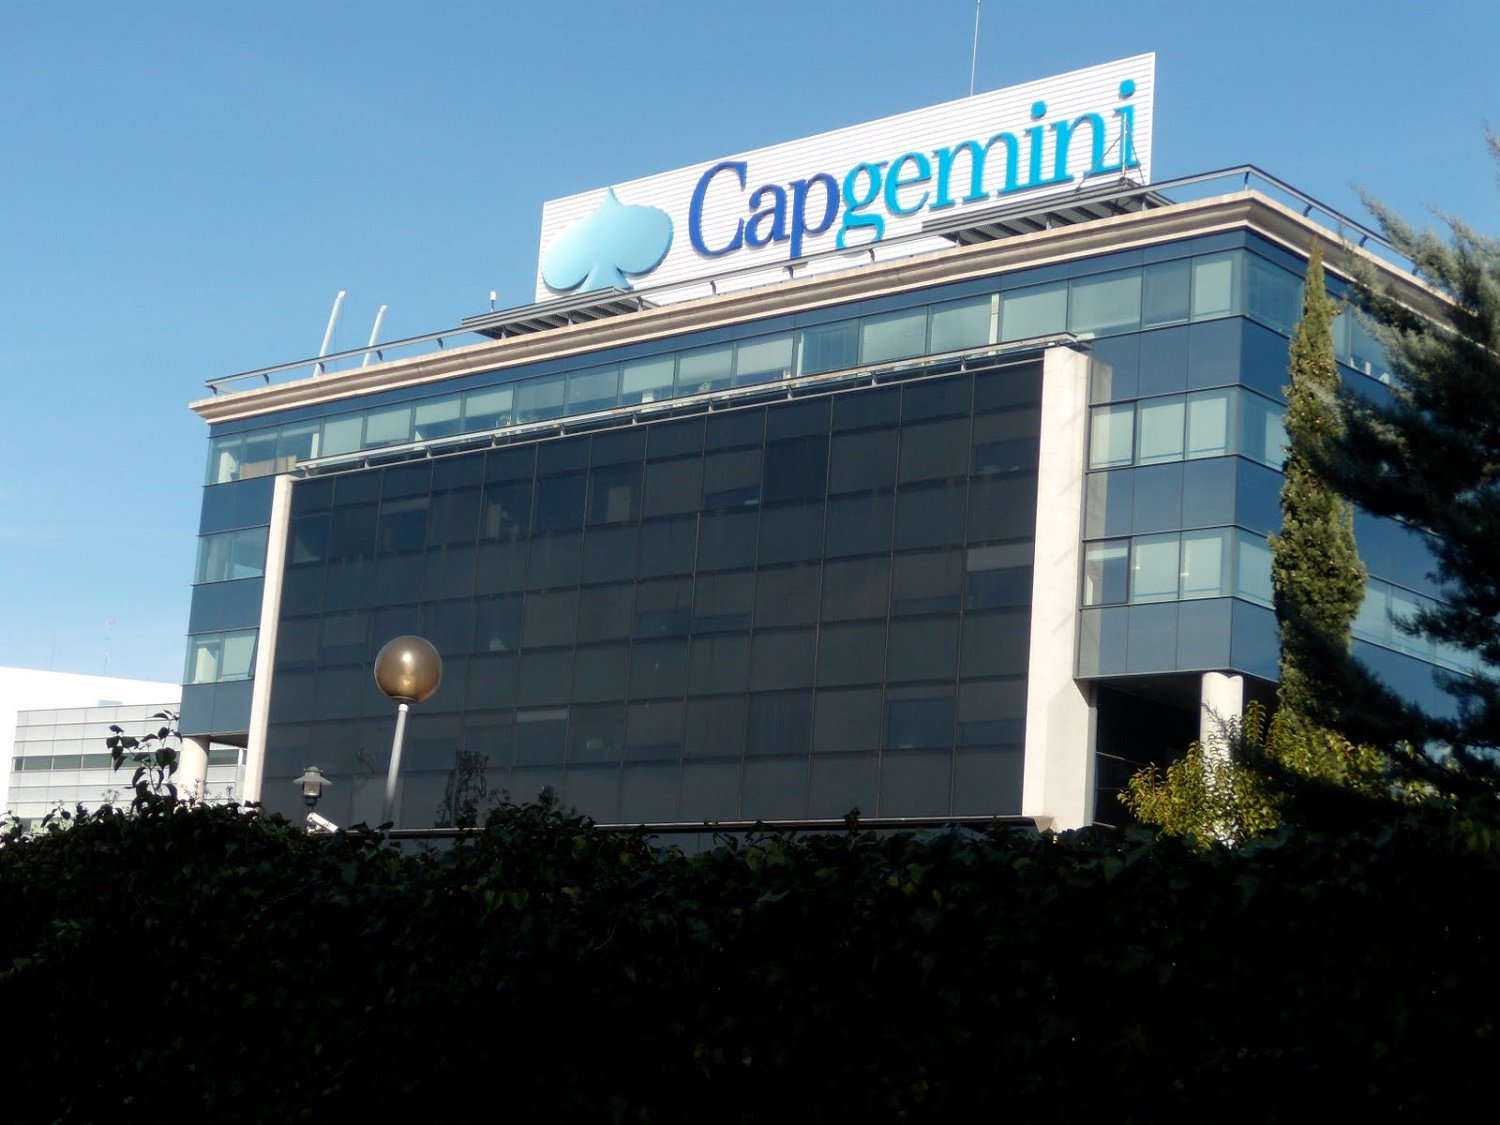

# Project Description:

Our team is excited to embark on this class project that places a strong focus on harnessing the power of machine learning techniques to delve into the realm of employee satisfaction within the Capgemini company. Our primary objective is to get valuable insights into the numerous factors that underlie employee satisfaction in this specific organization. Through this analysis, we aim to predict employee satisfaction ratings using a diverse set of machine learning techniques, including but not limited to sentiment analysis and classification algorithms.


The potential outcomes of this analysis hold significant promise for Capgemini and similar companies. By tapping into the predictive power of machine learning, our project has the capacity to significantly elevate employee morale and overall satisfaction. Furthermore, it could equip a company with the knowledge needed to make data-driven decisions and implement targeted strategies aimed at optimizing the working environment and enhancing the overall employee experience.
 

To facilitate this endeavor, we will be utilizing a Kaggle dataset that captures self-reported employee satisfaction data from within Capgemini. This dataset will serve as the foundational basis for our analysis. In our pursuit of comprehensive understanding, we may augment this primary dataset with additional relevant data sources. These supplementary datasets may include information on salary structures, demographics, and other factors that are not originally included in the core dataset. By incorporating this supplementary data, we aim to gain a more holistic perspective on the intricacies of employee satisfaction, and thereby refine the accuracy and depth of our predictive models.
 

By the conclusion of this project, we anticipate having not only a predictive model for employee satisfaction but also a wealth of knowledge that can empower Capgemini and similar enterprises to cultivate a more positive and productive work environment for their staff.


References:

 https://www.kaggle.com/datasets/manishkr1754/capgemini-employee-reviews-dataset

 

# The Model

The data is an extensive survey done at the Capgemini company to evaluate the overall employees' satisfaction in their jobs.

Here is an overview of the data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/Capgemini_Employee_Reviews_from_AmbitionBox.csv')


In [2]:
df.head()

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Senior Consultant,Pune,Full Time,General Insurance Department,8 Sep 2023,4.0,4.0,3.0,3.0,4.0,4.0,4.0,Deserved candidates are promoted promptly.\r\n...,With designation promotions good salary increm...
1,Senior Software Engineer,"Kolkata, West Bengal",Full Time,Software Development Department,7 Sep 2023,3.0,4.0,4.0,3.0,4.0,4.0,3.0,You got lot of learning platform and monthly l...,You will get fully not tech project.\r\nThere ...
2,Senior Consultant,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,6 Sep 2023,4.0,4.0,5.0,3.0,3.0,4.0,3.0,Based on which Business Unit you are you will ...,Some top level management people bring bad nam...
3,Senior Consultant,"Pune, Maharashtra",Full Time,Banking Operations Department,6 Sep 2023,1.0,2.0,4.0,1.0,4.0,1.0,1.0,Some client projects are good as they use the ...,"Culture, micro management, unprofessional beha..."
4,Team Lead,"Noida, Uttar Pradesh",Full Time,IT Infrastructure Services Department,5 Sep 2023,4.0,5.0,4.0,4.0,4.0,4.0,3.0,"I have worked in IBM (4 years) ,TCS (1 year) ,...",Medical insurance amount is quite low compare ...


# Division of Labor

Our initial plan is as follows:

Data Cleaning: Data cleaning, addressing missing data and outliers.

Feature Engineering: Focus on feature selection and engineering.

Modeling: Implementation and comparison of the chosen models.

Validation: Model validation and utilizing cross-validation techniques.

Hyperparameter Tuning: Optimization of model parameters as needed.

<b>Here is the initial role of each team member</b>:


# Jace Rhea

### Model Selection
### Data Analysis and Cleaning
### Project coordination

# Yonghee Kim

### Model Selection
### Data Analysis and Cleaning
### Model Training

# Yu Zhou

### Feature Engineering
### Hyper Parameter Tuning

# Nabil Sleiman

### Model Selection
### Model Evaluation
### Model Validation
### Presentation

Even though we outlined our initial plan, we are <b>prepared to adapt as the project evolves</b> and more insights are gained from the data and models.

In [3]:
column_names = df.columns.tolist()
df_cols = pd.DataFrame( {'Columns': column_names} )

# Print the list of column names
df_cols

,Columns
0,Title
1,Place
2,Job_type
3,Department
4,Date
5,Overall_rating
6,work_life_balance
7,skill_development
8,salary_and_benefits
9,job_security


# 1. Data Preparation - Jace Rhea and Yonghee Kim


## Analyzing the Dataset

In [4]:
import numpy as np

df.head()

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Senior Consultant,Pune,Full Time,General Insurance Department,8 Sep 2023,4.0,4.0,3.0,3.0,4.0,4.0,4.0,Deserved candidates are promoted promptly.\r\n...,With designation promotions good salary increm...
1,Senior Software Engineer,"Kolkata, West Bengal",Full Time,Software Development Department,7 Sep 2023,3.0,4.0,4.0,3.0,4.0,4.0,3.0,You got lot of learning platform and monthly l...,You will get fully not tech project.\r\nThere ...
2,Senior Consultant,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,6 Sep 2023,4.0,4.0,5.0,3.0,3.0,4.0,3.0,Based on which Business Unit you are you will ...,Some top level management people bring bad nam...
3,Senior Consultant,"Pune, Maharashtra",Full Time,Banking Operations Department,6 Sep 2023,1.0,2.0,4.0,1.0,4.0,1.0,1.0,Some client projects are good as they use the ...,"Culture, micro management, unprofessional beha..."
4,Team Lead,"Noida, Uttar Pradesh",Full Time,IT Infrastructure Services Department,5 Sep 2023,4.0,5.0,4.0,4.0,4.0,4.0,3.0,"I have worked in IBM (4 years) ,TCS (1 year) ,...",Medical insurance amount is quite low compare ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26993 entries, 0 to 26992
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                25913 non-null  object 
 1   Place                24597 non-null  object 
 2   Job_type             11556 non-null  object 
 3   Department           22083 non-null  object 
 4   Date                 25915 non-null  object 
 5   Overall_rating       25898 non-null  float64
 6   work_life_balance    26977 non-null  float64
 7   skill_development    26976 non-null  float64
 8   salary_and_benefits  26947 non-null  float64
 9   job_security         26943 non-null  float64
 10  career_growth        26931 non-null  float64
 11  work_satisfaction    26909 non-null  float64
 12  Likes                23905 non-null  object 
 13  Dislikes             23038 non-null  object 
dtypes: float64(7), object(7)
memory usage: 2.9+ MB


The following features have missing data:


<Axes: >

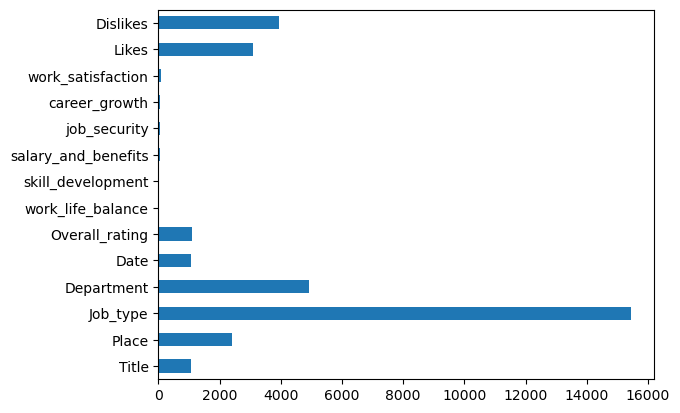

In [6]:
print (f"The following features have missing data:")
summation_missing = df.isnull().sum()
summation_missing.plot(kind='barh')

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (100*df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])
missing_data.head(20)

,Total Missing,Percent Missing
Job_type,15437,57.188901
Department,4910,18.189901
Dislikes,3955,14.651947
Likes,3088,11.440003
Place,2396,8.876375
Overall_rating,1095,4.056607
Title,1080,4.001037
Date,1078,3.993628
work_satisfaction,84,0.311192
career_growth,62,0.229689


In [8]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

# percent of data that is missing
percent_of_data_missing = round((total_missing / total_cells) * 100, 2)
print(f"{percent_of_data_missing}% of the data is missing.")

8.82% of the data is missing.


### Ratings by Frequency

C:\Users\nabil\AppData\Local\Temp\ipykernel_28104\2537028073.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


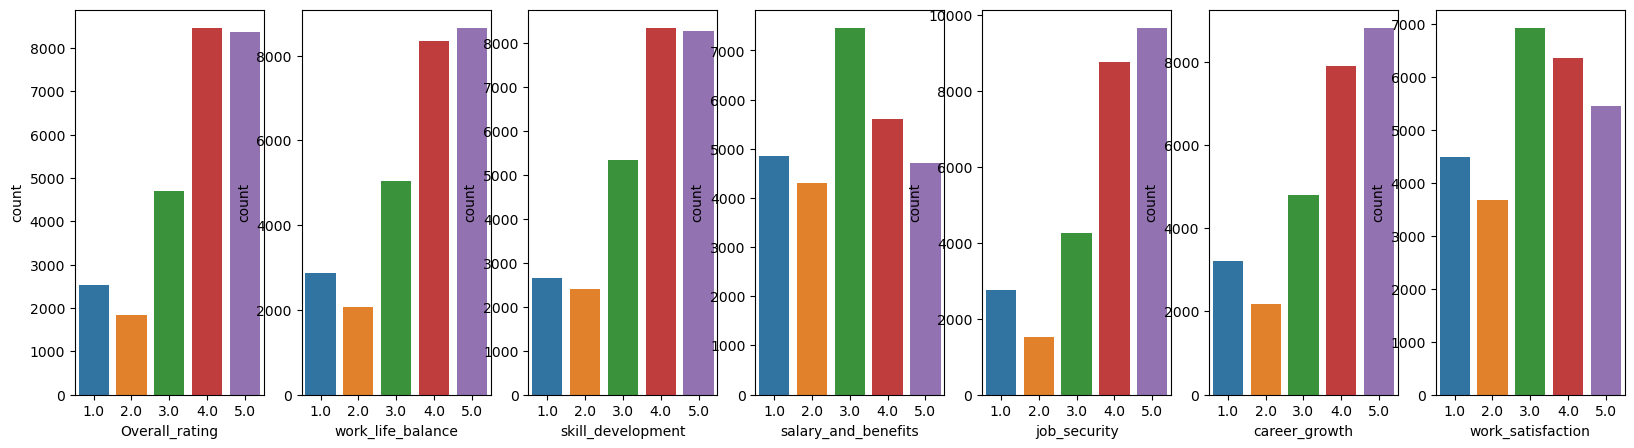

In [9]:
import seaborn as sns

categorical_columns = [
    "Overall_rating",
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
]

fig, ax = plt.subplots(1, 7)
fig.set_size_inches(20, 5)
for index, column in enumerate(categorical_columns):
    sns.countplot(df, x=column, ax=ax[index])
fig.show()

### Aggregate Ratings

We have a nice bell curve with 2 outliers for the highest and near lowest rankings.

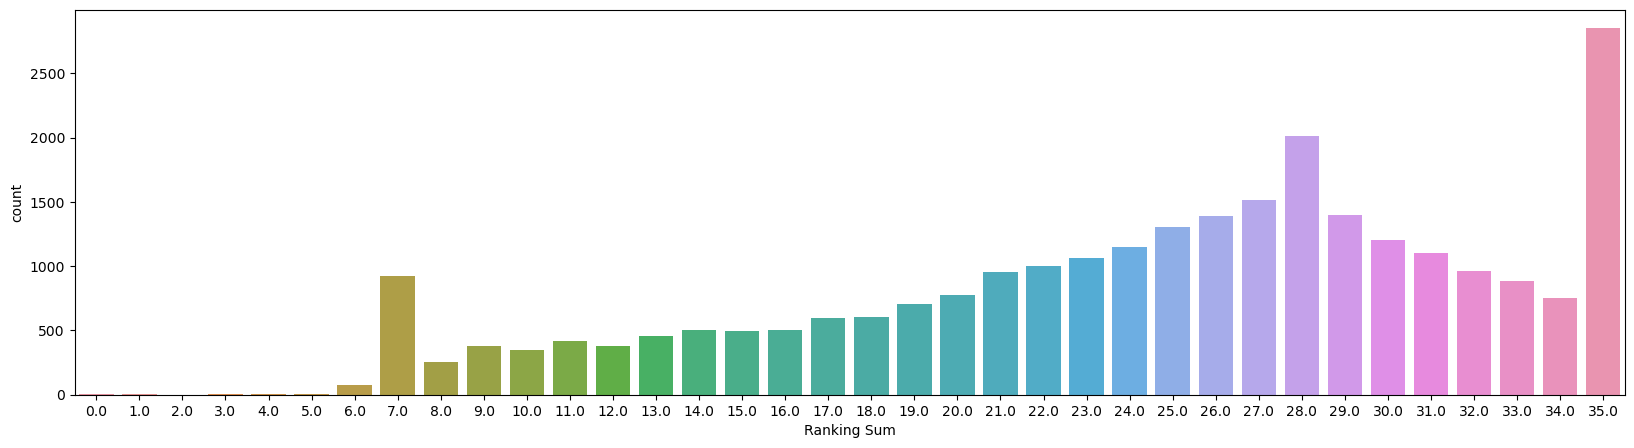

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

categorical_columns = [
    "Overall_rating",
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
]

category_total = df[categorical_columns].sum(axis=1)
df_category_total = pd.DataFrame({"Ranking Sum": category_total})
sns.countplot(df_category_total, x="Ranking Sum")
# increase size of figure
fig = plt.gcf()
fig.set_size_inches(20, 5)
fig.show()

### Job Types

Virtually everyone is full time.  

count         11556
unique            5
top       Full Time
freq          11340
Name: Job_type, dtype: object


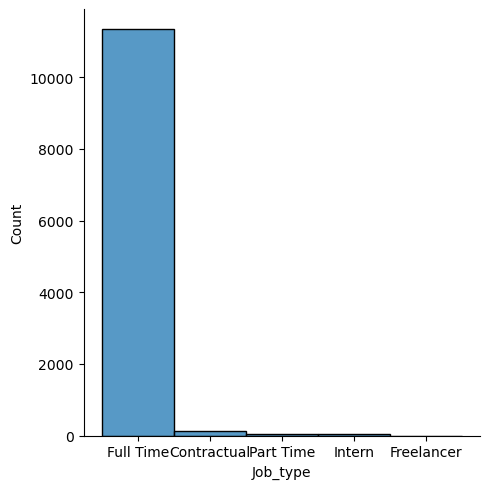

In [11]:
print(df["Job_type"].describe())
sns.displot(df["Job_type"])

### Departments

<Axes: >

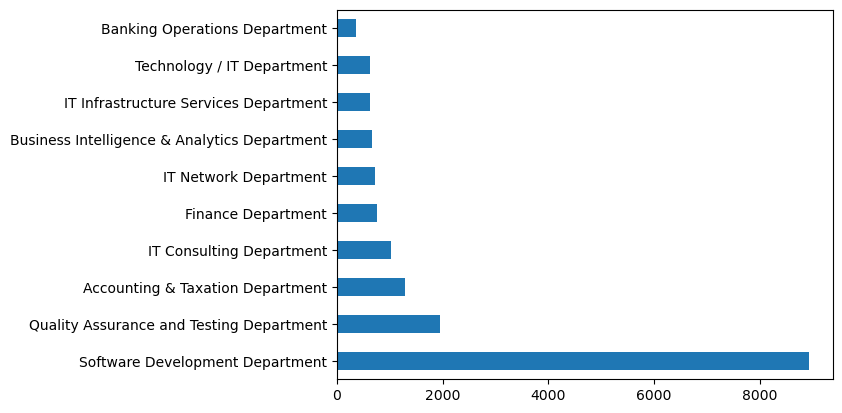

In [12]:
# graph the top 10 most common job titles
df["Department"].value_counts().head(10).plot(kind="barh")

### Places

<Axes: >

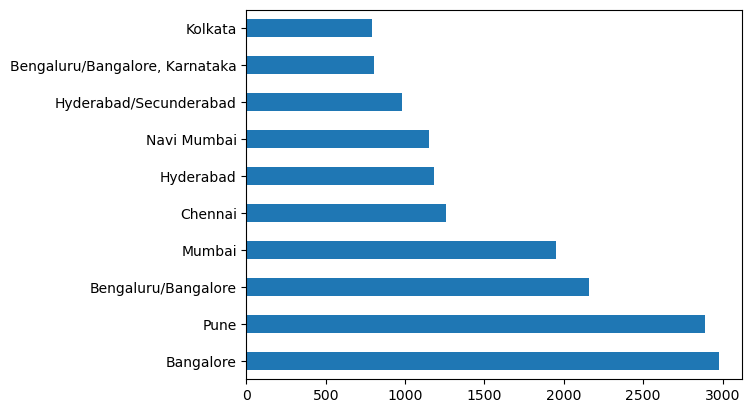

In [13]:
# graph the top 10 most common job titles
df["Place"].value_counts().head(10).plot(kind="barh")

### Titles

<Axes: >

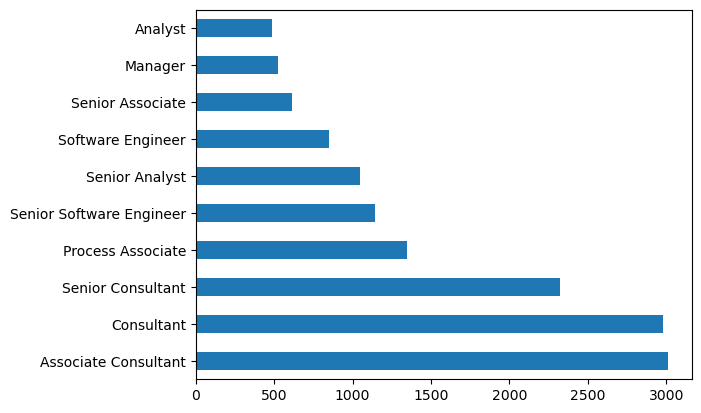

In [14]:
# graph the top 10 most common job titles
df["Title"].value_counts().head(10).plot(kind="barh")

### Correlation of Ratings

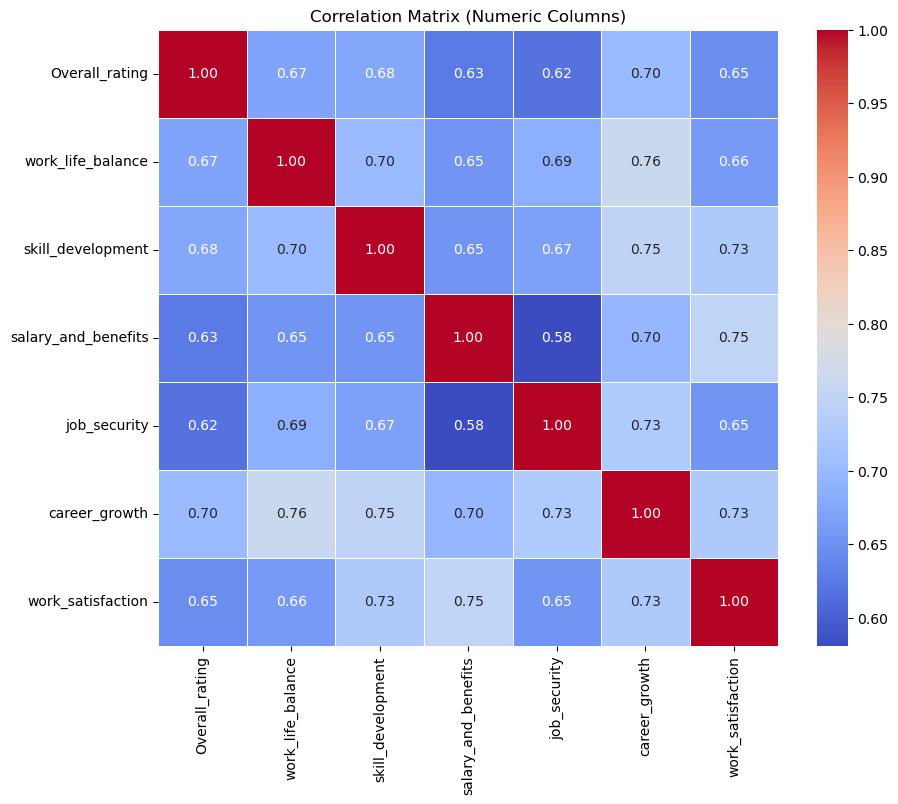

In [15]:
numeric_columns = [
    "Overall_rating",
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
]
numeric_corr = df[numeric_columns].corr()
# correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

In [16]:
ix = numeric_corr.sort_values("Overall_rating", ascending=False).index
ix = ix.drop("Overall_rating")
print(
    f"The self rankings with the highest to lowest correlation with Overall_rating are:"
)
ix.values

The self rankings with the highest to lowest correlation with Overall_rating are:


array(['career_growth', 'skill_development', 'work_life_balance',
       'work_satisfaction', 'salary_and_benefits', 'job_security'],
      dtype=object)

In [17]:
print(
    f"The self rankings with the highest correlation are {ix[0]} and {ix[1]} with a correlation of {numeric_corr.loc[ix[0], ix[1]]}"
)

The self rankings with the highest correlation are career_growth and skill_development with a correlation of 0.7469945623877832


In [18]:
print(
    f"The self rankings with the lowest correlation are {ix[4]} and {ix[5]} with a correlation of {numeric_corr.loc[ix[4], ix[5]]}"
)

The self rankings with the lowest correlation are salary_and_benefits and job_security with a correlation of 0.5808948987666473


## Cleaning the data

### Remove rows where overall_rating is null
Drop rows with missing values in the column Overall_rating. Overall rating is the target column and required for classification.

In [19]:
# nabil sleiman
# create a hwldwut df where overall_rating was null in original df
holdout_df = df[df['Overall_rating'].isnull()]

In [20]:
# nabil sleiman
holdout_df.tail()

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
26988,Senior Director,NaN,NaN,IT Security Department,5 Sep 2017,NaN,1.0,1.0,1.0,1.0,1.0,1.0,"no stretched pressures on margins, which makes...",very bureaucratic
26989,Senior Consultant,NaN,NaN,Technology / IT Department,3 Sep 2017,NaN,5.0,1.0,1.0,4.0,2.0,1.0,capgemini quality resource hiring is missing.H...,good
26990,System Engineer,NaN,NaN,IT Network Department,7 Sep 2017,NaN,3.0,3.0,2.0,3.0,1.0,1.0,Very good employee engagement activities.,Career growth opportunity is less
26991,Hr Generalist,Kolkata,NaN,HR Operations Department,6 Sep 2017,NaN,4.0,3.0,3.0,4.0,4.0,2.0,The company is open to innovation and readily ...,No
26992,Resume Writer,Hyderabad,NaN,NaN,4 Mar 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
holdout_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 13090 to 26992
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                17 non-null     object 
 1   Place                10 non-null     object 
 2   Job_type             1 non-null      object 
 3   Department           15 non-null     object 
 4   Date                 17 non-null     object 
 5   Overall_rating       0 non-null      float64
 6   work_life_balance    1091 non-null   float64
 7   skill_development    1090 non-null   float64
 8   salary_and_benefits  1070 non-null   float64
 9   job_security         1067 non-null   float64
 10  career_growth        1063 non-null   float64
 11  work_satisfaction    1043 non-null   float64
 12  Likes                12 non-null     object 
 13  Dislikes             11 non-null     object 
dtypes: float64(7), object(7)
memory usage: 128.3+ KB


In [22]:
# Title is almost always missing when overall rating is missing
before_drop = len(df.index)
df = df.dropna(subset=["Title", "Overall_rating"])
after_drop = len(df.index)
dropped = before_drop - after_drop
print(
    f"There were {before_drop} rows before dropping 'Overall_rating' and {after_drop} rows after dropping 'Overall_rating\n'",
    f"{dropped} were removed from analysis" 
)

There were 26993 rows before dropping 'Overall_rating' and 25896 rows after dropping 'Overall_rating
' 1097 were removed from analysis


### Impute Missing Data

In [23]:
# fill in empty values with NA
# fix Place data
no_place = {
    "..": "na",
    "any location": "na",
    "any": "na",
    "any place": "na",
    "client location ": "na",
    "client office": "na",
    "confidential": "na",
    "customer location": "na",
    "do not with to disclose": "na",
    "doesn" "t matter": "na",
    "everywhere": "na",
    "i don" "t know i did only internship only": "na",
    "no idea": "na",
    "office": "na",
    "somewhere": "na",
    "xyz": "na",
    "it's very good experience.": "na",
    "i don't know i did only internship only": "na",
}

outside_india = {
    "uk": "united kingdom",
    "usa": "united states",
    "sydneu": "sydney",
}

bangalore = {
    "6b bangalore": "bangalore",
    "6b ecospace": "bangalore",
    "6b": "bangalore",
    "bagalore": "bangalore",
    "baglore": "bangalore",
    "bamgalore": "bangalore",
    "banagalore": "bangalore",
    "banaglore": "bangalore",
    "bangaloe": "bangalore",
    "bangalor": "bangalore",
    "bangalore 6b": "bangalore",
    "bangalore dtp": "bangalore",
    "bangalore epip": "bangalore",
    "bangalore rural": "bangalore",
    "bangalore urban": "bangalore",
    "bangalore whitefield": "bangalore",
    "bangalore.": "bangalore",
    "bangalore/bengaluru": "bangalore",
    "bangalores": "bangalore",
    "bangalorr": "bangalore",
    "bangaluru": "bangalore",
    "banglore bmp": "bangalore",
    "banglore datacom": "bangalore",
    "banglore whitefield": "bangalore",
    "banglore": "bangalore",
    "bbangalore": "bangalore",
    "bengalore": "bangalore",
    "bengaluru": "bangalore",
    "bengaluru/bangalore": "bangalore",
    "benglore": "bangalore",
    "benguluru": "bangalore",
    "blore": "bangalore",
    "blr": "bangalore",
    "capgemini bangalore": "bangalore",
    "dtp bangalore": "bangalore",
    "dtp": "bangalore",
    "whietfield": "bangalore",
    "whiltefield": "bangalore",
    "whiltefield": "bangalore",
    "white feeld": "bangalore",
    "white field dtp": "bangalore",
    "white field summit towers a": "bangalore",
    "white field": "bangalore",
    "White Filed": "bangalore",
    "white filed": "bangalore",
    "whitefield bangalore": "bangalore",
    "whitefield": "bangalore",
    "whitefiled": "bangalore",
    "whitfield": "bangalore",
}

rest_of_india = {
    "hyderabad/secunderabad": "hyderabad",
    "hyderbad": "hyderabad",
    "hydrabad": "hyderabad",
    "hyder": "hyderabad",
    "hyd": "hyderabad",
    "navi mumbai": "mumbai",
    "mumbai suburban": "mumbai",
    "airoli mumbai": "mumbai",
    "mumbai airoli": "mumbai",
    "airoli navi mumbai": "mumbai",
    "airloi": "mumbai",
    "airoli sez": "mumbai",
    "airloi": "mumbai",
    "airoli,mumbai": "mumbai",
    "airoli,navi mumbai": "mumbai",
    "airolo": "mumbai",
    "airoli sez": "mumbai",
    "airoli west": "mumbai",
    "airoli,maharashtra": "mumbai",
    "airolo": "mumbai",
    "airoil mumbai": "mumbai",
    "airoli yosemite": "mumbai",
    "airoli mindspace": "mumbai",
    "airolii": "mumbai",
    "aeroli": "mumbai",
    "airoli mindspace": "mumbai",
    "new mumbai": "mumbai",
    "vikhroli": "vikhroli",
    "vikhroli - mumbai": "vikhroli",
    "vikhroli east": "vikhroli",
    "vikhroli,mumbai and airoli": "vikhroli",
    "vikroli": "vikhroli",
    "vikroholi": "vikhroli",
    "vikhroli office": "vikhroli",
    "vikhroli mumbai": "vikhroli",
    "vikhroli,mumbai": "vikhroli",
    "vikhrolli": "vikhroli",
    "vikhrolli": "vikhroli",
    "gurgaon/gurugram": "gurgaon",
    "gurugram": "gurgaon",
    "greater noida": "noida",
    "noida nsez": "noida",
    "nsez noida": "noida",
    "nsez": "noida",
    "noida sez": "noida",
    "new delhi": "delhi",
    "delhi ncr": "delhi",
    "talwade pune": "pune",
    "pune talwade": "pune",
    "punr": "pune",
    "hinjewadi pune": "pune",
    "pune hinjewadi": "pune",
    "chenani": "chennai",
    "trichy": "tiruchirappalli",
    "tiruchirapalli": "tiruchirappalli",
    "tiruchuli": "tiruchirappalli",
    "selam": "salem",
    "yasomite airoli": "yosemite airoli",
    "wfh (working remotely)": "remote",
    "work from home (working remotely)": "remote",
    "remote (working remotely)": "remote",
    "remotely": "remote",
    "although i am still working from home so it depends project to project": "remote",
    "home": "remote",
    "no i work from home only during vivid 29": "remote",
    "trich": "tiruchirapalli",
    "trichirapalli": "tiruchirapalli",
    "trichy,vrn": "tiruchirapalli",
    "trichirapalli": "tiruchirapalli",
    "trichirappalli": "tiruchirapalli",
    "talawade": "pune",
    "talwade": "pune",
    "pu ne": "pune",
    "pu e": "pune",
    "pu": "pune",
    "talvade pune": "pune",
    "talwadde": "pune",
    "talawde": "pune",
    "pune,talawade": "pune",
    "talawade,pune": "pune",
    "pube": "pune",
    "talwade,pune": "pune",
    "talawade pune": "pune",
    "talwade pune. depend it" "s chandes": "pune",
}

all_places = no_place | outside_india | bangalore | rest_of_india


df["Place"] = df["Place"].fillna("na").apply(lambda x: x.lower().split(", ")[0])
df["Place"] = df["Place"].replace(all_places)




### Make Title info consistent

In [24]:
# make casing consistent
# replace Sr./Sr with Senior and fix missing spaces
df["Title"] = df["Title"].str.lower()
df["Title"] = df["Title"].str.replace("sr. ", "senior ")
df["Title"] = df["Title"].str.replace("sr ", "senior ")
df["Title"] = df["Title"].str.replace("sr. ", "senior ")
df["Title"] = df["Title"].str.replace("sr", "senior")
df["Title"] = df["Title"].str.replace("operation ", "operations ")
df["Title"] = df["Title"].str.replace("human resource", "hr")
df["Title"] = df["Title"].str.replace("human resources", "hr")

df.to_csv('hello.csv')

### Tokenize Titles

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
# without min_df the vectorizer will include words that only appear once
# found min_df=0.0001 to be a good value
count_vect = CountVectorizer(stop_words="english", min_df=0.0001)
X_train_counts = count_vect.fit_transform(df["Title"])
count_array = X_train_counts.toarray()
token_df = pd.DataFrame(data=count_array, columns=count_vect.get_feature_names_out())

# if there are overlapping column names, drop them
token_df = token_df.drop(df.columns, axis=1, errors="ignore")

df = df.join(token_df)

df.head()

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,...,wfm,windows,wintel,wlan,wm,work,workday,working,writer,years
0,senior consultant,pune,Full Time,General Insurance Department,8 Sep 2023,4.0,4.0,3.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,senior software engineer,kolkata,Full Time,Software Development Department,7 Sep 2023,3.0,4.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,senior consultant,bangalore,Full Time,Software Development Department,6 Sep 2023,4.0,4.0,5.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,senior consultant,pune,Full Time,Banking Operations Department,6 Sep 2023,1.0,2.0,4.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,team lead,noida,Full Time,IT Infrastructure Services Department,5 Sep 2023,4.0,5.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
title_vectorized = list(token_df.columns) + ["Overall_rating"]
title_corr = df[title_vectorized].corr()


title_sorted = title_corr.sort_values("Overall_rating", ascending=False)
ix = title_sorted.index.drop("Overall_rating")
print(
    f"The self rankings with the highest to lowest correlation with Overall_rating are:"
)
ix
title_sorted.head(3)

The self rankings with the highest to lowest correlation with Overall_rating are:


,02,365,5g,a3,a4,a5,abap,abinitio,access,account,...,windows,wintel,wlan,wm,work,workday,working,writer,years,Overall_rating
Overall_rating,-0.002109,-0.003282,-0.009106,0.004870,0.005455,0.007695,0.006714,-0.004631,-0.008821,0.003527,...,0.004158,-0.002983,-0.009106,-0.012302,-0.000370,-0.000370,0.031144,-0.012327,0.002780,1.000000
remotely,-0.001869,-0.001618,-0.001618,-0.002862,-0.005205,-0.002472,-0.009126,-0.001869,-0.003099,-0.004767,...,0.003101,-0.002643,-0.001618,-0.003854,-0.001618,-0.001618,0.994297,-0.006203,-0.002698,0.031813
working,-0.001879,-0.001628,-0.001628,-0.002936,-0.005235,-0.002486,-0.009178,-0.001879,-0.003117,-0.004794,...,0.003028,-0.002658,-0.001628,-0.003876,-0.001628,-0.001628,1.000000,-0.006239,-0.002713,0.031144


The highest correlations between an overall rating and titles is "remotely' and 'working'.  Employees enjoy (or possible don't) enjoy working from home!


Let's create a column to indicate if someone works remotely or not and use that instead of job title.

In [27]:
# where Place is NA and titla contains the phrase "Remotely" we can assume they work remotely for their Place.
def isRemoteTitle(title, place):
    if "Remote" == place or "Remote".casefold() in title.casefold():
        return 1
    else:
        return 0


df["Is Remote"] = df.apply(lambda x: isRemoteTitle(x.Title, x.Place), axis=1)

### Parse Dates and fill in missing ones

In [28]:
def get_date(x):
    try:
        return str(x)[2:]
    except:
        return "None"


df["Date"] = df["Date"].fillna("0 None").apply(get_date)
df["Date"] = pd.to_datetime(df["Date"], format="%b %Y", errors="raise")

### Fill missing 'rating data' with Frequent value

In [29]:
# Set ratings as categorical data
from pandas import CategoricalDtype
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

rating_columns = [
    "Overall_rating",
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
]

# use SimpleImputer to fill missing values for columnn Overall_rating with the most frequent value
for column in rating_columns:
    imputer = SimpleImputer(strategy="most_frequent")
    df[column] = imputer.fit_transform(df[[column]])
    df[column] = df[column].astype("float64")

### Fill missing 'Job Types' with Frequent value

In [30]:
# Filling every NA cell for 'Job_type' with 'Full Time'
df["Job_type"].fillna("Full Time", inplace=True)
df["Job_type"] = df["Job_type"].astype("string")

In [31]:
# Set rest of columns as strings
string_columns = ["Title", "Place", "Department", "Likes", "Dislikes"]

for column in string_columns:
    df[column] = df[column].astype("string")

In [32]:
print("Data after preperation")
df.info()

df.to_csv("data/Capgemini_Employee_Reviews_from_AmbitionBox_cleaned.csv", index=False)

Data after preperation
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25896 entries, 0 to 26975
Columns: 554 entries, Title to Is Remote
dtypes: datetime64[ns](1), float64(546), int64(1), string(6)
memory usage: 110.7 MB


In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import os

In [34]:
# number of unique records, total records and column data type
for col in df.columns[:14]:
    a = col, len(df[col].unique()), len(df[col])
    b = df[col].dtypes
    print(a, b)

('Title', 4176, 25896) string
('Place', 531, 25896) string
('Job_type', 5, 25896) string
('Department', 620, 25896) string
('Date', 74, 25896) datetime64[ns]
('Overall_rating', 5, 25896) float64
('work_life_balance', 5, 25896) float64
('skill_development', 5, 25896) float64
('salary_and_benefits', 5, 25896) float64
('job_security', 5, 25896) float64
('career_growth', 5, 25896) float64
('work_satisfaction', 5, 25896) float64
('Likes', 17498, 25896) string
('Dislikes', 17552, 25896) string


In [35]:
# feature_columns = [
#     "work_life_balance",
#     "skill_development",
#     "salary_and_benefits",
#     "job_security",
#     "career_growth",
#     "work_satisfaction",
# ]

In [36]:
df.describe()

,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,02,365,5g,...,windows,wintel,wlan,wm,work,workday,working,writer,years,Is Remote
count,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000,24978.000000,24978.000000,24978.000000,...,24978.000000,24978.000000,24978.000000,24978.000000,24978.000000,24978.000000,24978.000000,24978.000000,24978.000000,25896.000000
mean,3.707213,3.677943,3.650873,3.049158,3.799235,3.643034,3.177247,0.000160,0.000120,0.000120,...,0.001161,0.000320,0.000120,0.000681,0.000120,0.000120,0.021579,0.001762,0.000400,0.020775
std,1.257226,1.282376,1.264767,1.333114,1.261506,1.325383,1.346632,0.012654,0.010959,0.010959,...,0.034055,0.017894,0.010959,0.026080,0.010959,0.010959,0.145307,0.041935,0.021915,0.142634
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


# Yonghee - Processing end

# Yonghee - Likes, Dislikes -> Vector

In [37]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [38]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

nltk.download("punkt")  # nltk data download

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nabil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

punkt: pre Trained dataset for Word2Vec model

Meaning of each Parameter of Word2Vec model:
- sentences: List of tokenized sentences.
- vector_size: Size of the vectors for each word(=dimension), Normally Middle size = 100
- window: Size of the context window considered by the model.
- min_count: Minimum frequency for a word to be included in the model.
- workers: Number of CPU cores used for model training.

When creating a Word2Vec model, parameters set as below. 

* sentences=tokenized_likes: It represents a list of tokenized sentences used for model training.
* vector_size=100: It indicates the size of the vectors for each word. A larger vector size can capture more abstract features but comes with increased computational cost, so an appropriate size, such as 100, is commonly used.
* window=5: It denotes the size of the context window, specifying the number of words considered around a given word. For example, with window=5, up to five words before and after each word are taken into account.
* min_count=1: It is the minimum frequency required for a word to be included in the model. This setting avoids including words with very low frequencies in the model.
* workers=4: It represents the number of CPU cores used for model training. Parallel processing can speed up training, and it's generally recommended to set it according to the number of available CPU cores.

The vector_size parameter represents the size or dimension of the vectors assigned to each word. Therefore, vector_size=100 means representing each word as a 100-dimensional vector. A larger vector size creates a larger and more complex representation space for words. While larger vector sizes can provide more sophisticated representations, they come with higher computational costs and a risk of overfitting, especially with limited data. Thus, choosing an appropriate vector size is crucial.
Additionally, word embedding technologies like Word2Vec are trained to capture semantic similarity between words. However, each dimension of the vectors does not have a direct interpretable meaning. Each dimension represents specific word features learned by the model. As a result, interpreting the exact meaning of each dimension can be challenging.

In [39]:
# Likes Column's Blank -> ' '
df["Likes"] = df["Likes"].fillna("")

# Text -> Tokenize & Save as List
tokenized_likes = df["Likes"].apply(word_tokenize)

# Word2Vec model - Need to choose the 'Vector size'
word2vec_model = Word2Vec(
    sentences=tokenized_likes, vector_size=100, window=5, min_count=1, workers=4
)

# Vector
word_vectors = word2vec_model.wv

# make 'Sentence Vectors'
sentence_vectors = tokenized_likes.apply(
    lambda x: np.mean(
        [word_vectors[token] for token in x if token in word_vectors], axis=0
    )
)

# Add 'Sentece_Vector' to dataframe
max_dimensions = max(
    sentence_vectors.apply(lambda x: len(x) if isinstance(x, np.ndarray) else 0)
)
for i in range(max_dimensions):
    df[f"Likes_vector_{i}"] = sentence_vectors.apply(
        lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan
    )

In [40]:
# Dislikes Column's Blank -> ' '
df["Dislikes"] = df["Dislikes"].fillna("")

# Text -> Tokenize & Save as List
tokenized_dislikes = df["Dislikes"].apply(word_tokenize)

# Word2Vec model for Dislikes
word2vec_model_dislikes = Word2Vec(
    sentences=tokenized_dislikes, vector_size=100, window=5, min_count=1, workers=4
)

# Vector for Dislikes
word_vectors_dislikes = word2vec_model_dislikes.wv

# Make 'Sentence Vectors' for Dislikes
sentence_vectors_dislikes = tokenized_dislikes.apply(
    lambda x: np.mean(
        [word_vectors_dislikes[token] for token in x if token in word_vectors_dislikes],
        axis=0,
    )
)

# Add 'Sentence_Vector' for Dislikes to DataFrame
max_dimensions_dislikes = max(
    sentence_vectors_dislikes.apply(
        lambda x: len(x) if isinstance(x, np.ndarray) else 0
    )
)
for i in range(max_dimensions_dislikes):
    df[f"Dislikes_vector_{i}"] = sentence_vectors_dislikes.apply(
        lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan
    )

In [41]:
pd.set_option('display.max_columns', None)  # print all columns
pd.set_option('display.max_rows', None)  # print all rows

column_names = df.columns.tolist()
df_cols = pd.DataFrame( {'Columns': column_names} )

# Print the list of column names
# df_cols

# Yu Zhou - Feature Engieering 

### **Scaling the data**

The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature. 

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

Tree based models such as **Decision Trees** and **Random Forest** does not require feature scaling to be performed as they are not sensitive to the variance in the data.

We will scale the data for **SVM**.  We will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance. The standard score of sample x is calculated as:

> **z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall_rating,25896.0,3.707213,1.257226,1.000000,3.000000,4.000000,5.000000,5.000000
work_life_balance,25896.0,3.677943,1.282376,1.000000,3.000000,4.000000,5.000000,5.000000
skill_development,25896.0,3.650873,1.264767,1.000000,3.000000,4.000000,5.000000,5.000000
salary_and_benefits,25896.0,3.049158,1.333114,1.000000,2.000000,3.000000,4.000000,5.000000
job_security,25896.0,3.799235,1.261506,1.000000,3.000000,4.000000,5.000000,5.000000
career_growth,25896.0,3.643034,1.325383,1.000000,3.000000,4.000000,5.000000,5.000000
work_satisfaction,25896.0,3.177247,1.346632,1.000000,2.000000,3.000000,4.000000,5.000000
02,24978.0,0.000160,0.012654,0.000000,0.000000,0.000000,0.000000,1.000000
365,24978.0,0.000120,0.010959,0.000000,0.000000,0.000000,0.000000,1.000000
5g,24978.0,0.000120,0.010959,0.000000,0.000000,0.000000,0.000000,1.000000


### Univariate Analysis

In [43]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

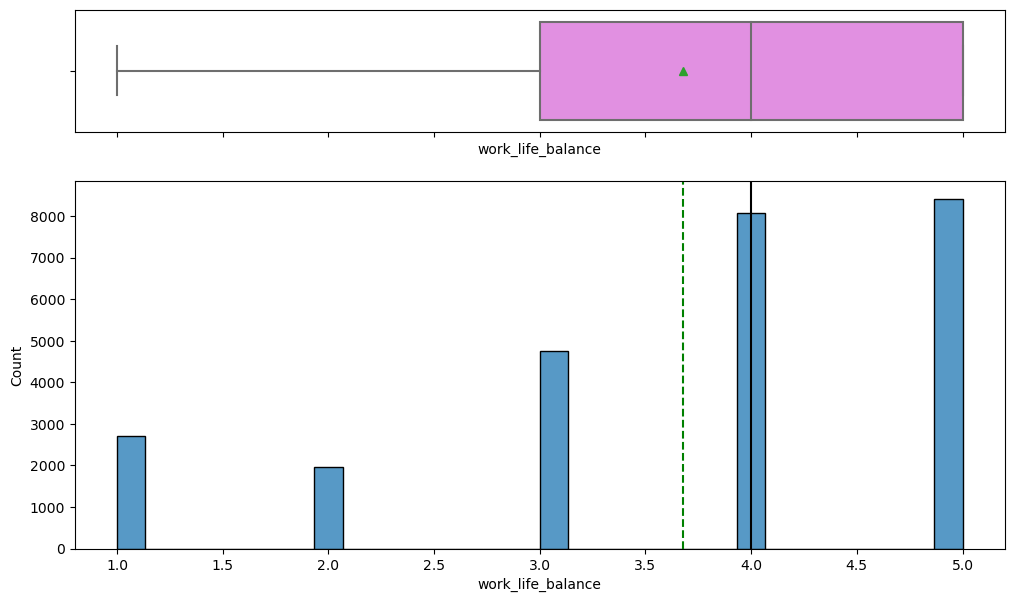

In [44]:
histogram_boxplot(df, "work_life_balance")

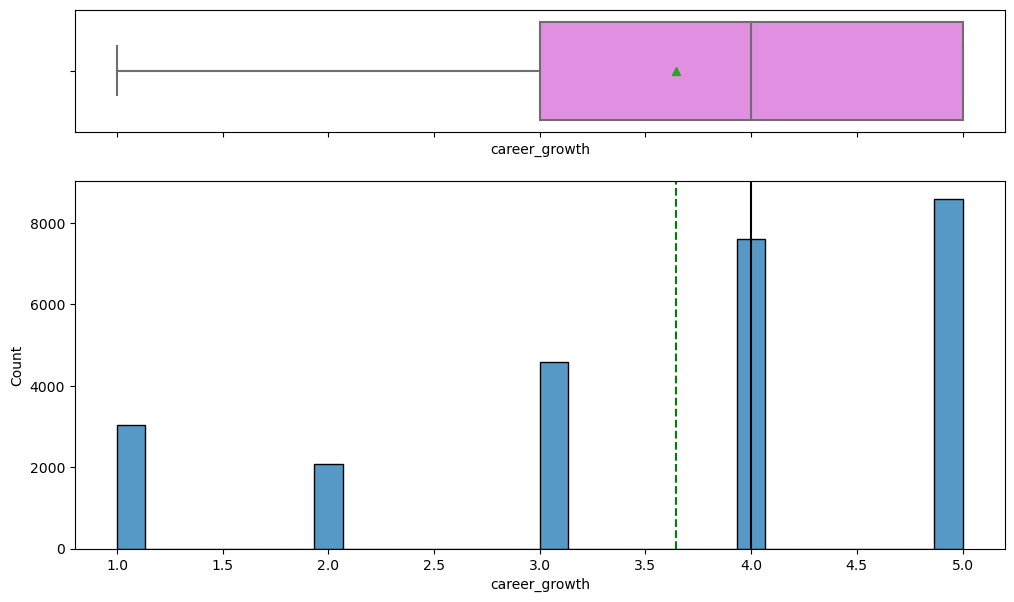

In [45]:
histogram_boxplot(df, "career_growth")

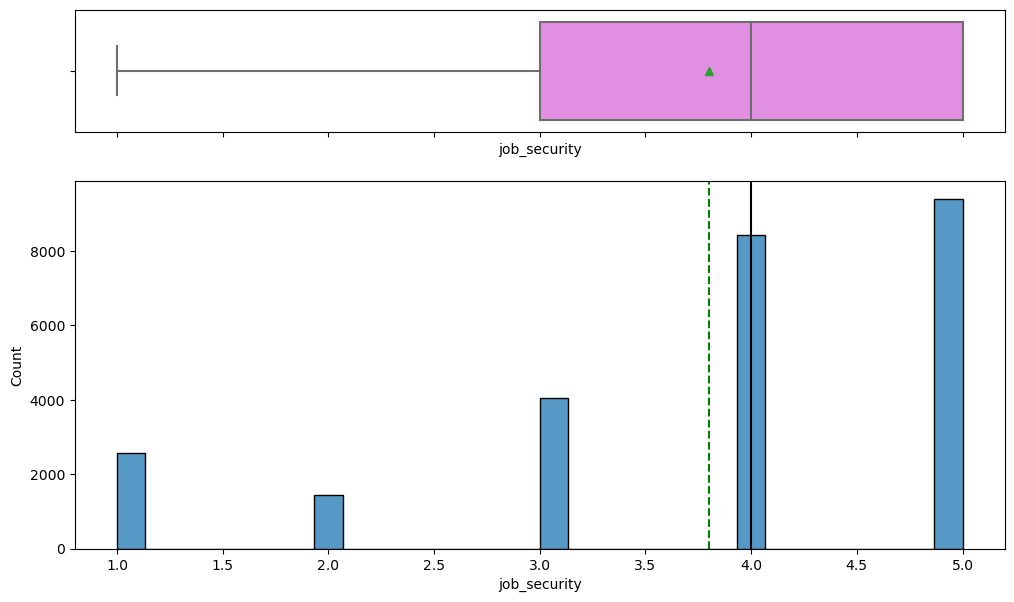

In [46]:
histogram_boxplot(df, "job_security")

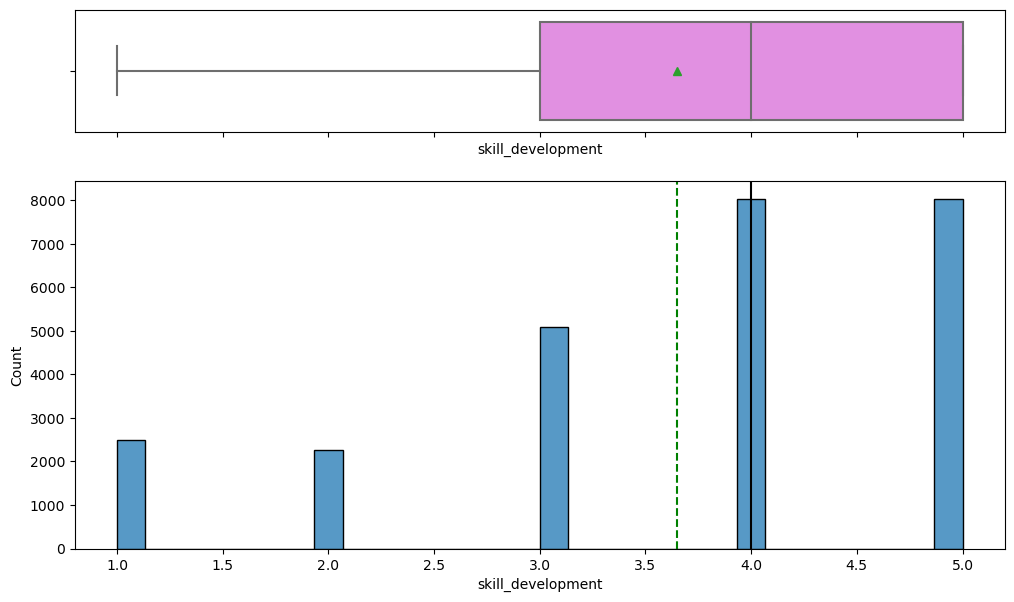

In [47]:
histogram_boxplot(df, "skill_development")

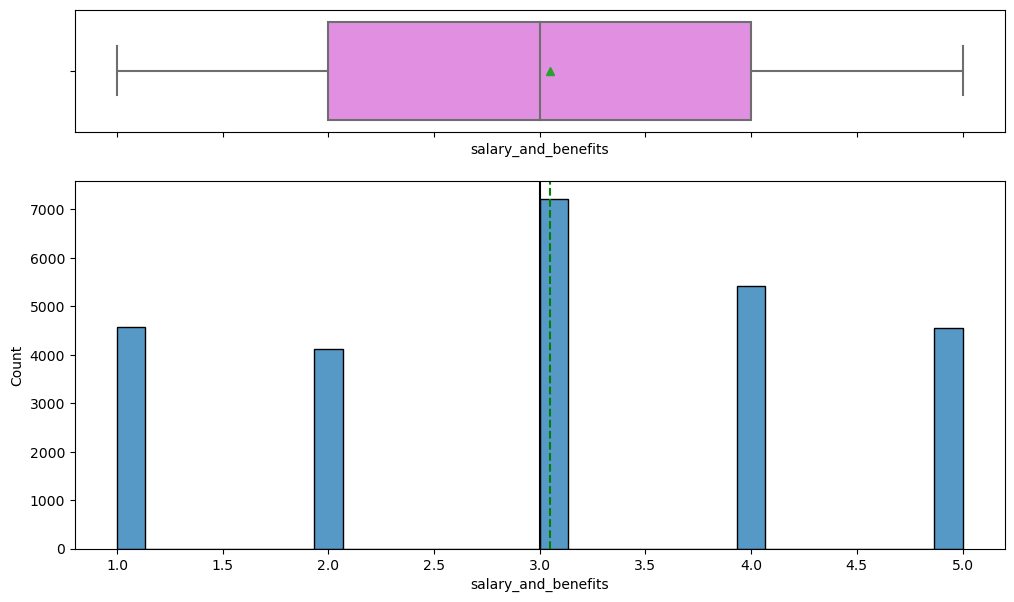

In [48]:
histogram_boxplot(df, "salary_and_benefits")

####  Creating functions that will help us with further analysis.

In [49]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [50]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.ylabel(target)
    plt.show()

Overall_rating      1.0   2.0   3.0   4.0   5.0    All
work_life_balance                                     
All                2528  1831  4705  8463  8369  25896
2.0                 231   555   756   270   140   1952
3.0                 324   453  1859  1656   469   4761
1.0                1604   435   351   164   144   2698
4.0                 210   272  1242  4648  1694   8066
5.0                 159   116   497  1725  5922   8419
------------------------------------------------------------------------------------------------------------------------


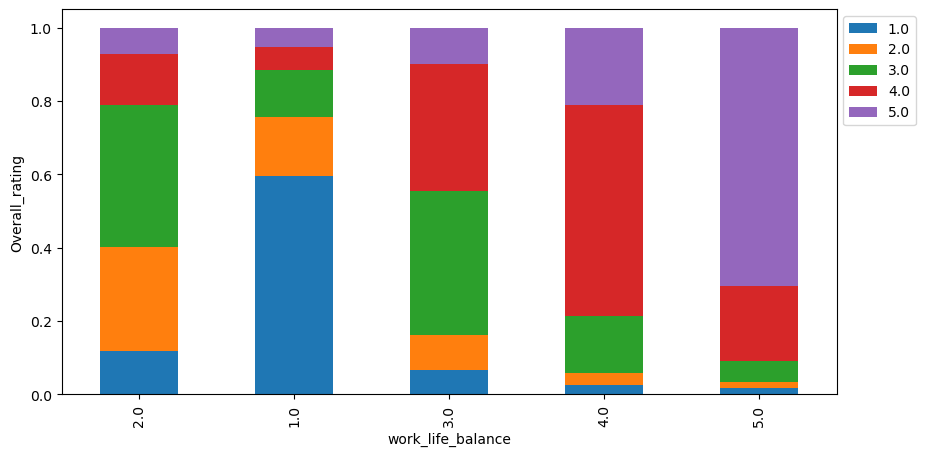

In [51]:
stacked_barplot(df, "work_life_balance", "Overall_rating")

Overall_rating   1.0   2.0   3.0   4.0   5.0    All
career_growth                                      
All             2528  1831  4705  8463  8369  25896
2.0              259   600   815   279   132   2085
1.0             1705   573   411   200   142   3031
3.0              232   370  1994  1528   451   4575
4.0              177   182  1091  4627  1534   7611
5.0              155   106   394  1829  6110   8594
------------------------------------------------------------------------------------------------------------------------


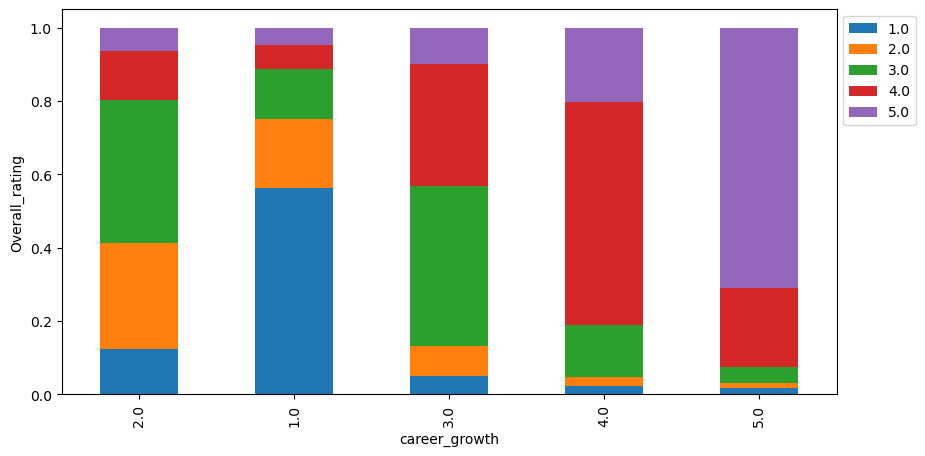

In [52]:
stacked_barplot(df, "career_growth", "Overall_rating")

Overall_rating   1.0   2.0   3.0   4.0   5.0    All
job_security                                       
All             2528  1831  4705  8463  8369  25896
3.0              373   514  1493  1222   456   4058
1.0             1454   409   338   195   167   2563
4.0              264   370  1643  4515  1645   8437
2.0              217   353   482   257   121   1430
5.0              220   185   749  2274  5980   9408
------------------------------------------------------------------------------------------------------------------------


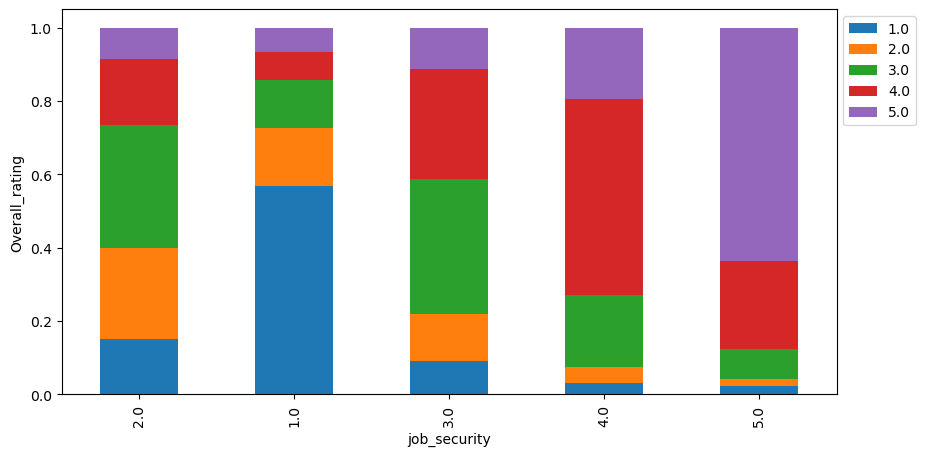

In [53]:
stacked_barplot(df, "job_security", "Overall_rating")

Overall_rating      1.0   2.0   3.0   4.0   5.0    All
skill_development                                     
All                2528  1831  4705  8463  8369  25896
2.0                 333   636   849   308   129   2255
3.0                 288   457  1978  1822   548   5093
1.0                1540   389   273   157   133   2492
4.0                 218   219  1200  4552  1829   8018
5.0                 149   130   405  1624  5730   8038
------------------------------------------------------------------------------------------------------------------------


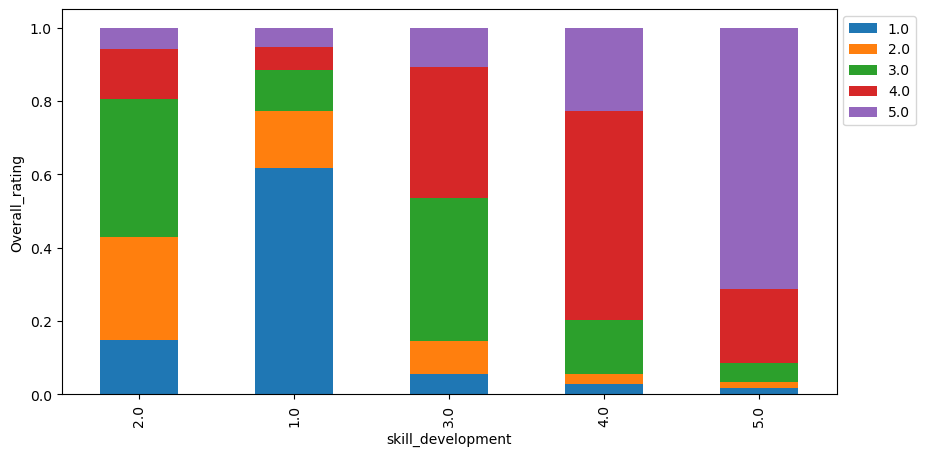

In [54]:
stacked_barplot(df, "skill_development", "Overall_rating")

Overall_rating        1.0   2.0   3.0   4.0   5.0    All
salary_and_benefits                                     
All                  2528  1831  4705  8463  8369  25896
1.0                  1838   909  1031   484   316   4578
2.0                   241   498  1652  1247   475   4113
3.0                   234   250  1510  3571  1656   7221
4.0                   134   116   391  2707  2078   5426
5.0                    81    58   121   454  3844   4558
------------------------------------------------------------------------------------------------------------------------


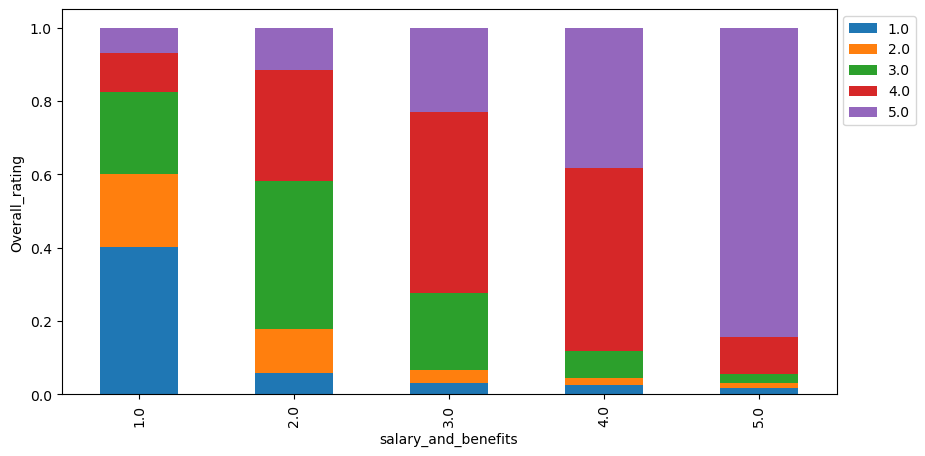

In [55]:
stacked_barplot(df, "salary_and_benefits", "Overall_rating")

Overall_rating      1.0   2.0   3.0   4.0   5.0    All
work_satisfaction                                     
All                2528  1831  4705  8463  8369  25896
1.0                1869   839   854   402   293   4257
2.0                 233   568  1420   969   354   3544
3.0                 190   254  1779  3168  1332   6723
4.0                 131    99   492  3270  2104   6096
5.0                 105    71   160   654  4286   5276
------------------------------------------------------------------------------------------------------------------------


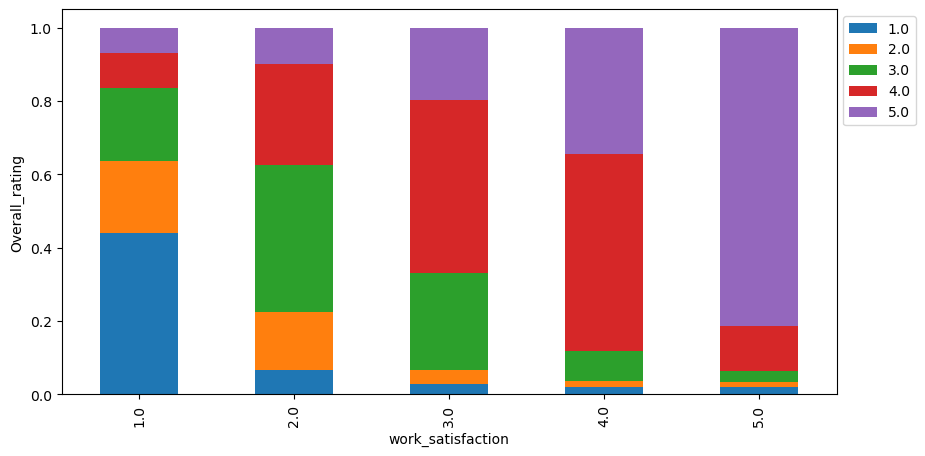

In [56]:
stacked_barplot(df, "work_satisfaction", "Overall_rating")

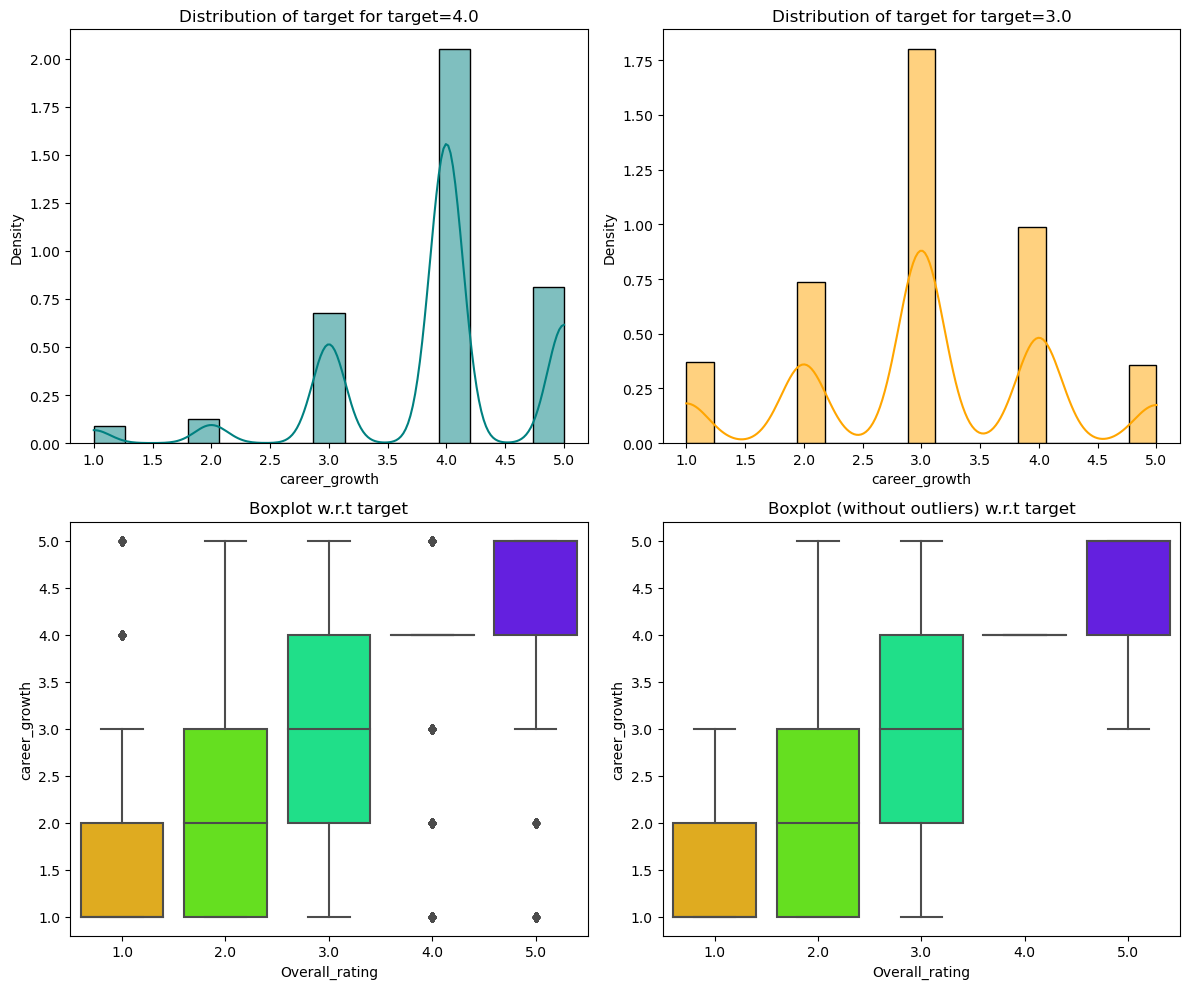

In [57]:
distribution_plot_wrt_target(df, "career_growth", "Overall_rating")

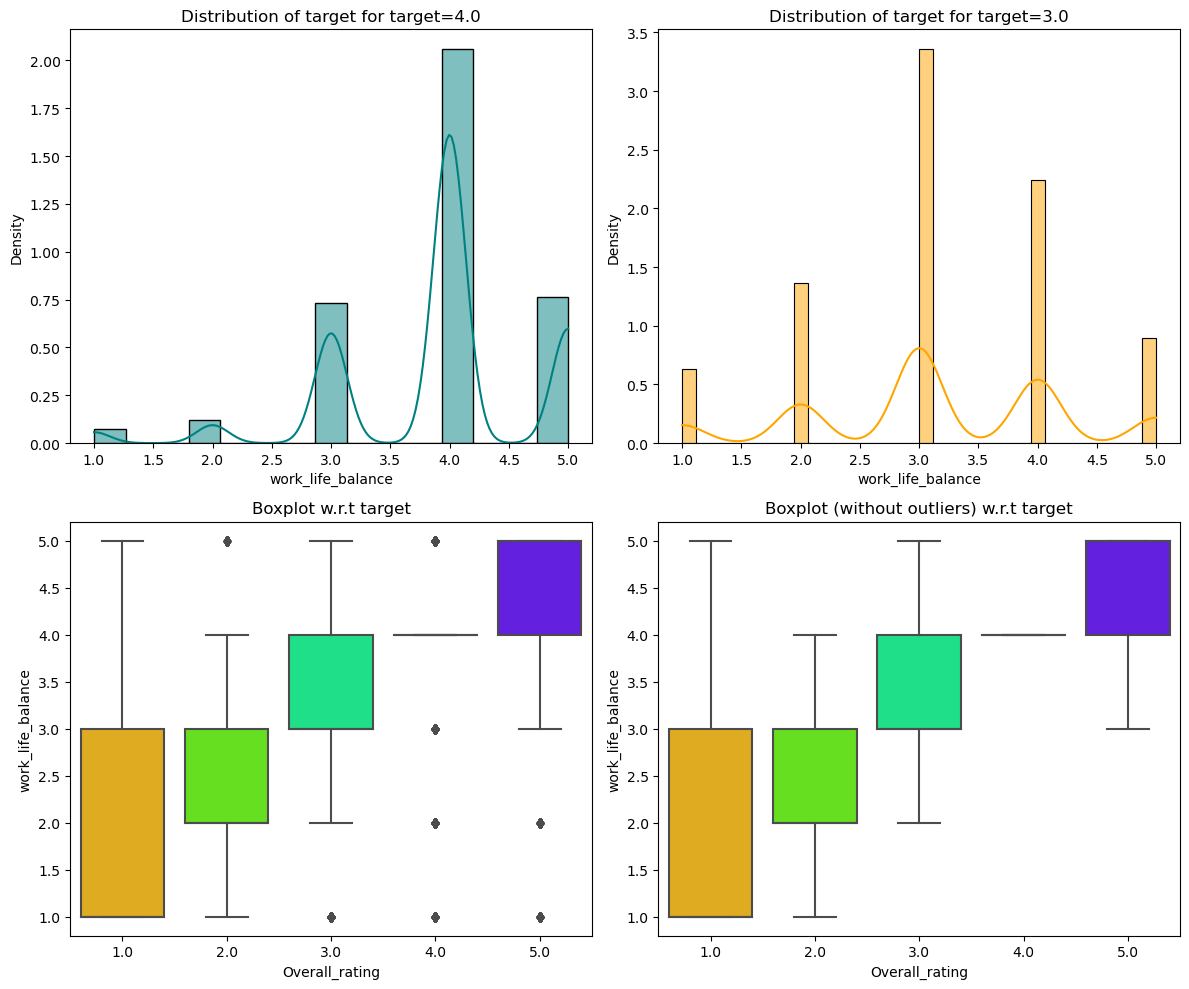

In [58]:
distribution_plot_wrt_target(df, "work_life_balance", "Overall_rating")

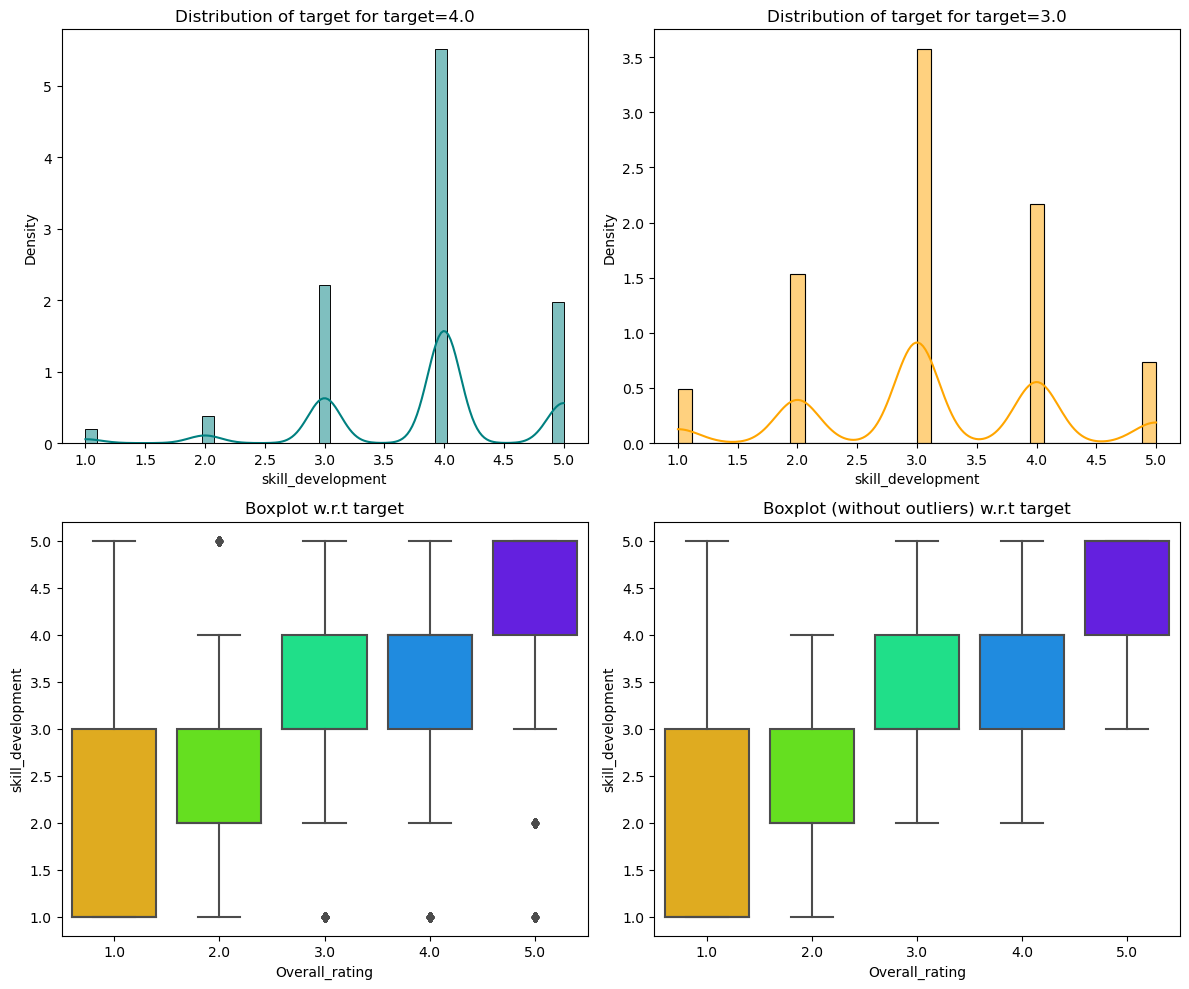

In [59]:
distribution_plot_wrt_target(df, "skill_development", "Overall_rating")

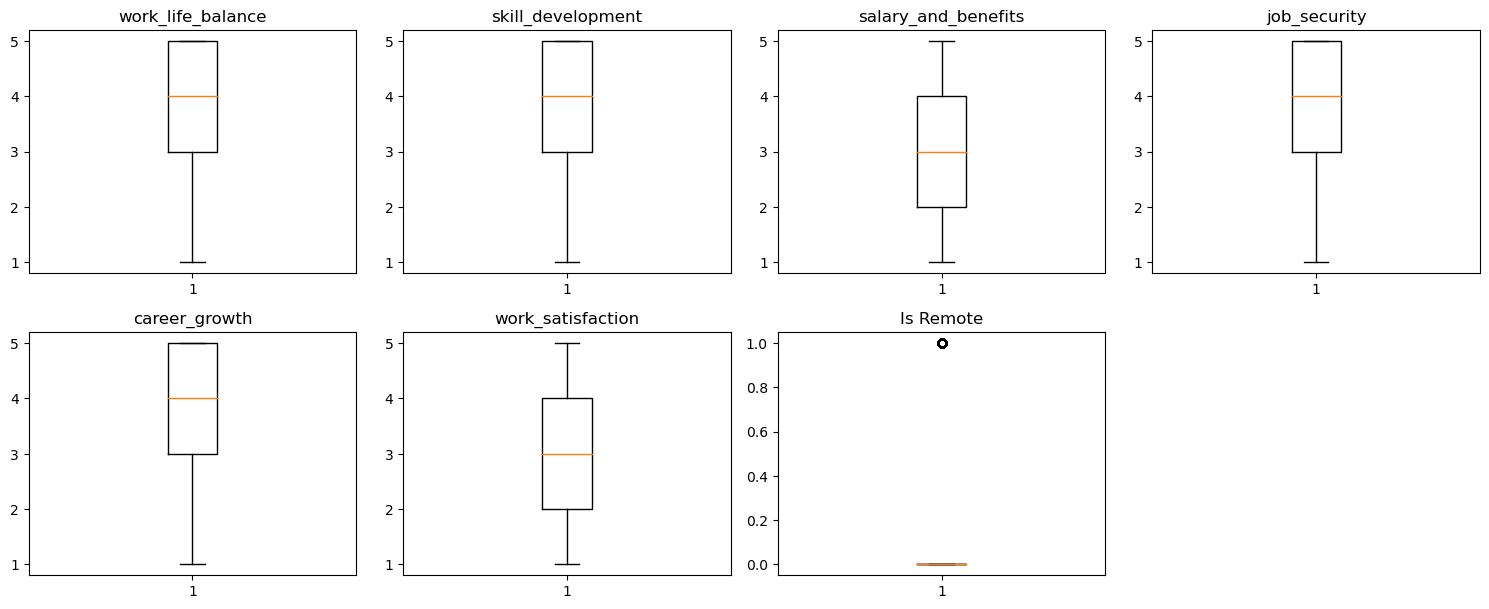

In [65]:
# outlier detection using boxplot
feature_columns = [
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
    "Is Remote"
]

numeric_columns = df[feature_columns].select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are no outliers in the data.

# Nabil - Finding best prediction classifier

In [66]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [67]:
# a function that takes a classifier, does the fitting, then generates the predictions.
# it calculates the accuracy score, the metrics accuracy and the f1 score
# then returns these values to be compared and sorted later to determine the best classifier
def run_classifier(model, X_1, y_1, X_2, y_2):
    classifier = model()
    classifier.fit(X_1, y_1)
    #print(classifier.score(X_test, y_test))
    y_p = classifier.predict(X_2)
    score = round(classifier.score(X_2, y_2) * 100., 2)
    accuracy = round(accuracy_score(y_2, y_p) * 100., 2)
    #f1 = round(f1_score(y_2, y_p) * 100., 2)
    return score, accuracy


<b> We plan to explore the following machine learning models:

### Classifiers:

<b>LogisticRegression
    
<b>SVC

<b>LinearSVC

<b>KNeighborsClassifier

<b>DecisionTreeClassifier

<b>RandomForestClassifier

<b>GaussianNB

<b>Perceptron
    
<b>SGDClassifier</b>

The database will be split 80% for training and 20% for testing.

<b>Precision score, Accuracy factors and F1 score</b> will be calculated to validate the success of the model training

In [68]:
# these are the model classifiers that will be used
modelclass = [LogisticRegression, SVC, LinearSVC, KNeighborsClassifier, DecisionTreeClassifier,
              RandomForestClassifier, GaussianNB, Perceptron, SGDClassifier]

# Split The Data

80% for training the Classifier, 20% for testing.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# let's split the data 80% for training and 20% to test the predictions
# df1 the data with the features
# df2 the factor to be predicted
#X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2, random_state=0)

In [70]:
feature_columns = [
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
    "Is Remote"
]

df1 = df[feature_columns]
df1.head()

,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Is Remote
0,4.0,3.0,3.0,4.0,4.0,4.0,0
1,4.0,4.0,3.0,4.0,4.0,3.0,0
2,4.0,5.0,3.0,3.0,4.0,3.0,0
3,2.0,4.0,1.0,4.0,1.0,1.0,0
4,5.0,4.0,4.0,4.0,4.0,3.0,0


In [71]:
def count_plot(var, dt, color='blue', title=None):
    d = dt[[var]].sort_values(by=var)
    sns.countplot(x = var, data = d, palette=[color]).legend(labels = ['Count'])
    if (not title):
        title = var
    plt.title(title)


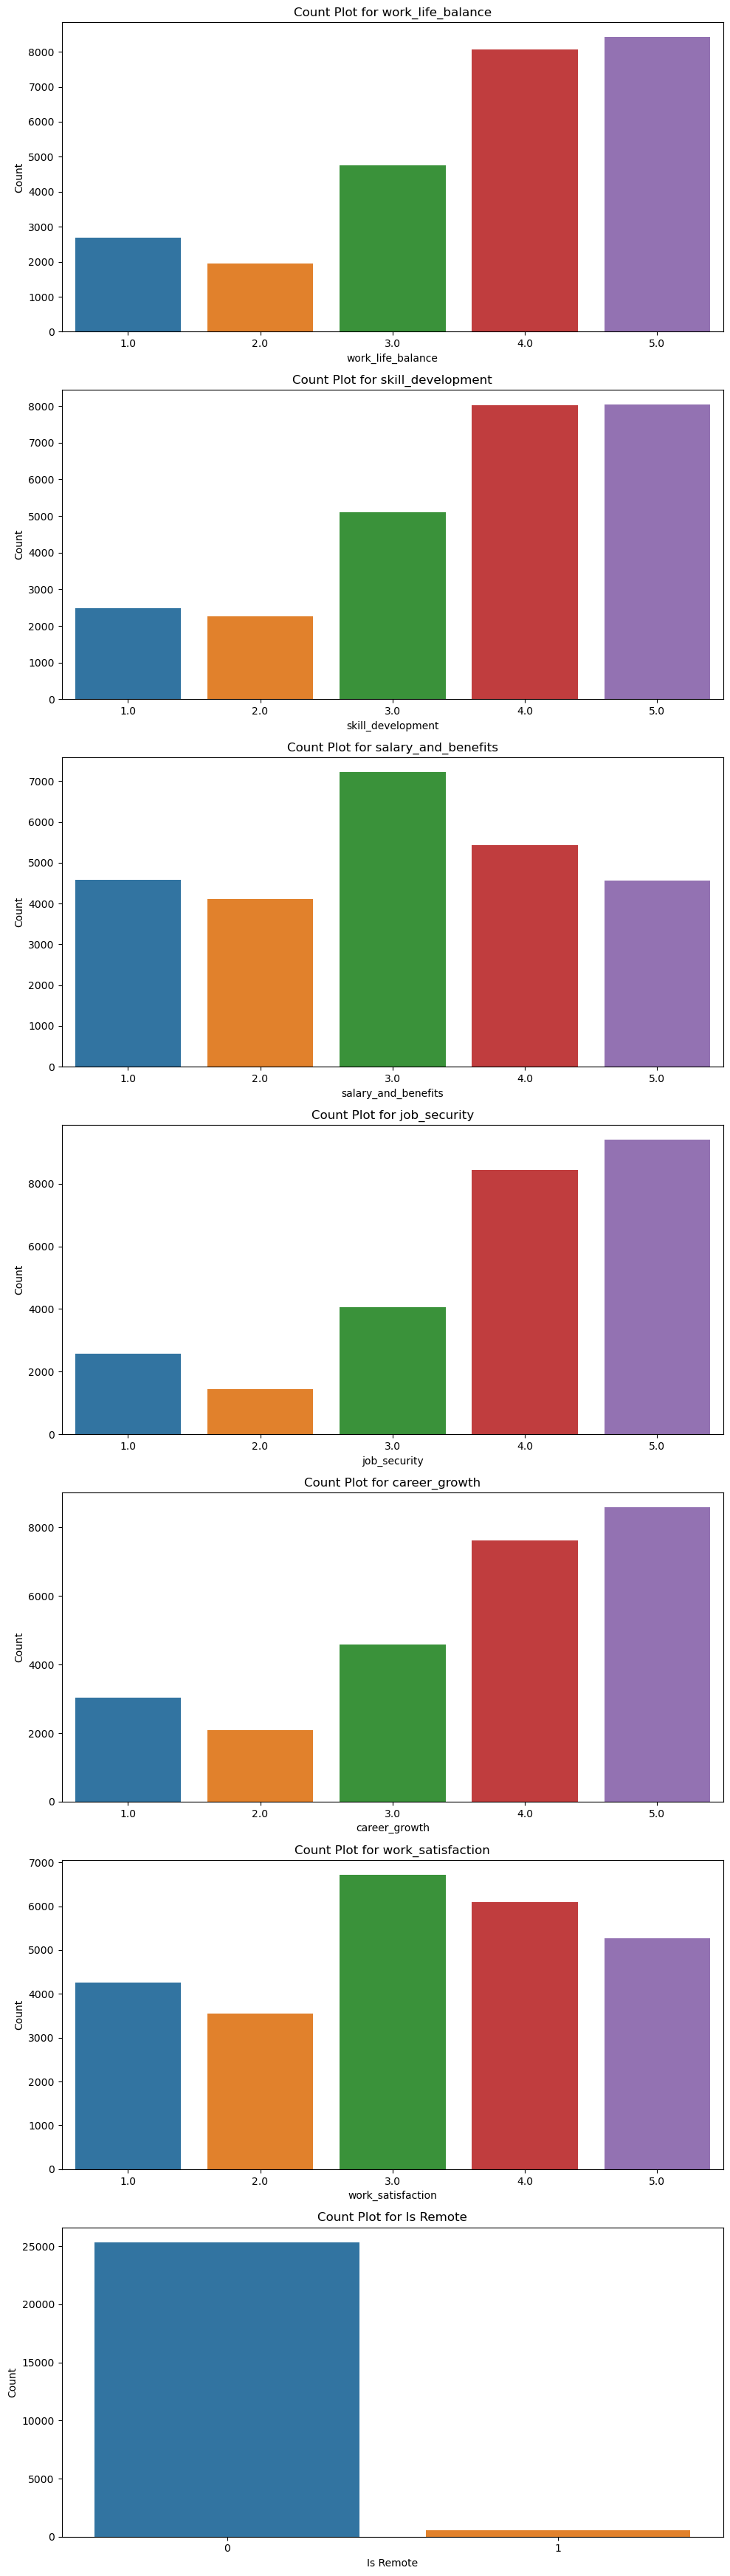

In [72]:
# Set up the matplotlib figure with required number of subplots
n_rows = len(feature_columns)
fig, axes = plt.subplots(n_rows, 1, figsize=(10, 5 * n_rows))

for i, column in enumerate(feature_columns):
    sns.countplot(x=column, data=df1, ax=axes[i])
    axes[i].set_title(f'Count Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [73]:
df2 = df[['Overall_rating']]
df2.head()

,Overall_rating
0,4.0
1,3.0
2,4.0
3,1.0
4,4.0


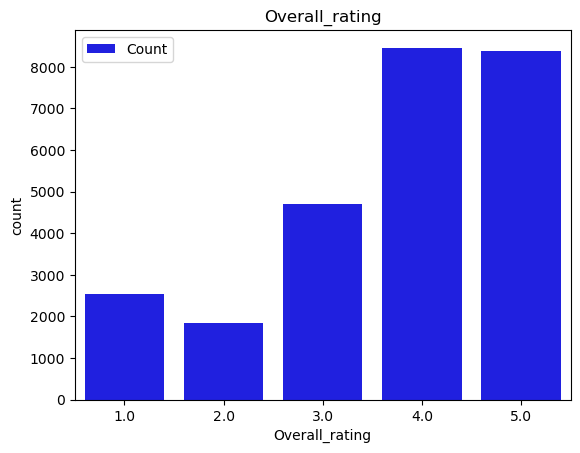

In [74]:
count_plot('Overall_rating', df2)

### Split the data. 80% for training, 20% for testing

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2, random_state=0)

### Loop through the classifiers

In [76]:
# calculate the score generated by each classifier using the function run_classifier on each class
def run_the_classifiers():
    scores = []
    accura = []
    for i in range(len(modelclass)):
        score, accuracy = run_classifier(modelclass[i], X_train, y_train, X_test, y_test)
        scores.append(score)
        accura.append(accuracy)
    return scores, accura

In [77]:
# print the calculated scores for each class in a sorted manner to determine which is the best classifier
scores, accura = run_the_classifiers()

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    'Score': scores,
    'Accuracy': accura,
    })


sorted = models.sort_values(by='Score', ascending=False)
sorted

,Model,Score,Accuracy
1,Support Vector Machines,65.27,65.27
6,Naive Bayes,63.15,63.15
0,Logistic Regression,62.39,62.39
5,Random Forest,62.34,62.34
4,Decision Tree,61.93,61.93
3,KNN,60.69,60.69
2,Linear SVC,53.15,53.15
8,Stochastic Gradient Decent,52.53,52.53
7,Perceptron,39.96,39.96


### In the last run, Support Vector Machines (SVC) was the best classifier with about 65% accuracy!

### Word2Vec Columns included - by Yonghee

In [78]:
feature_columns = [
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
    "Is Remote"
]

# Likes_vector
likes_vector_columns = [f"Likes_vector_{i}" for i in range(100)]

# Dislikes_vector
dislikes_vector_columns = [f"Dislikes_vector_{i}" for i in range(100)]

selected_columns = feature_columns + likes_vector_columns + dislikes_vector_columns

df1 = df[selected_columns]
# df1 = df[feature_columns]
df1.head()

,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Is Remote,Likes_vector_0,Likes_vector_1,Likes_vector_2,Likes_vector_3,Likes_vector_4,Likes_vector_5,Likes_vector_6,Likes_vector_7,Likes_vector_8,Likes_vector_9,Likes_vector_10,Likes_vector_11,Likes_vector_12,Likes_vector_13,Likes_vector_14,Likes_vector_15,Likes_vector_16,Likes_vector_17,Likes_vector_18,Likes_vector_19,Likes_vector_20,Likes_vector_21,Likes_vector_22,Likes_vector_23,Likes_vector_24,Likes_vector_25,Likes_vector_26,Likes_vector_27,Likes_vector_28,Likes_vector_29,Likes_vector_30,Likes_vector_31,Likes_vector_32,Likes_vector_33,Likes_vector_34,Likes_vector_35,Likes_vector_36,Likes_vector_37,Likes_vector_38,Likes_vector_39,Likes_vector_40,Likes_vector_41,Likes_vector_42,Likes_vector_43,Likes_vector_44,Likes_vector_45,Likes_vector_46,Likes_vector_47,Likes_vector_48,Likes_vector_49,Likes_vector_50,Likes_vector_51,Likes_vector_52,Likes_vector_53,Likes_vector_54,Likes_vector_55,Likes_vector_56,Likes_vector_57,Likes_vector_58,Likes_vector_59,Likes_vector_60,Likes_vector_61,Likes_vector_62,Likes_vector_63,Likes_vector_64,Likes_vector_65,Likes_vector_66,Likes_vector_67,Likes_vector_68,Likes_vector_69,Likes_vector_70,Likes_vector_71,Likes_vector_72,Likes_vector_73,Likes_vector_74,Likes_vector_75,Likes_vector_76,Likes_vector_77,Likes_vector_78,Likes_vector_79,Likes_vector_80,Likes_vector_81,Likes_vector_82,Likes_vector_83,Likes_vector_84,Likes_vector_85,Likes_vector_86,Likes_vector_87,Likes_vector_88,Likes_vector_89,Likes_vector_90,Likes_vector_91,Likes_vector_92,Likes_vector_93,Likes_vector_94,Likes_vector_95,Likes_vector_96,Likes_vector_97,Likes_vector_98,Likes_vector_99,Dislikes_vector_0,Dislikes_vector_1,Dislikes_vector_2,Dislikes_vector_3,Dislikes_vector_4,Dislikes_vector_5,Dislikes_vector_6,Dislikes_vector_7,Dislikes_vector_8,Dislikes_vector_9,Dislikes_vector_10,Dislikes_vector_11,Dislikes_vector_12,Dislikes_vector_13,Dislikes_vector_14,Dislikes_vector_15,Dislikes_vector_16,Dislikes_vector_17,Dislikes_vector_18,Dislikes_vector_19,Dislikes_vector_20,Dislikes_vector_21,Dislikes_vector_22,Dislikes_vector_23,Dislikes_vector_24,Dislikes_vector_25,Dislikes_vector_26,Dislikes_vector_27,Dislikes_vector_28,Dislikes_vector_29,Dislikes_vector_30,Dislikes_vector_31,Dislikes_vector_32,Dislikes_vector_33,Dislikes_vector_34,Dislikes_vector_35,Dislikes_vector_36,Dislikes_vector_37,Dislikes_vector_38,Dislikes_vector_39,Dislikes_vector_40,Dislikes_vector_41,Dislikes_vector_42,Dislikes_vector_43,Dislikes_vector_44,Dislikes_vector_45,Dislikes_vector_46,Dislikes_vector_47,Dislikes_vector_48,Dislikes_vector_49,Dislikes_vector_50,Dislikes_vector_51,Dislikes_vector_52,Dislikes_vector_53,Dislikes_vector_54,Dislikes_vector_55,Dislikes_vector_56,Dislikes_vector_57,Dislikes_vector_58,Dislikes_vector_59,Dislikes_vector_60,Dislikes_vector_61,Dislikes_vector_62,Dislikes_vector_63,Dislikes_vector_64,Dislikes_vector_65,Dislikes_vector_66,Dislikes_vector_67,Dislikes_vector_68,Dislikes_vector_69,Dislikes_vector_70,Dislikes_vector_71,Dislikes_vector_72,Dislikes_vector_73,Dislikes_vector_74,Dislikes_vector_75,Dislikes_vector_76,Dislikes_vector_77,Dislikes_vector_78,Dislikes_vector_79,Dislikes_vector_80,Dislikes_vector_81,Dislikes_vector_82,Dislikes_vector_83,Dislikes_vector_84,Dislikes_vector_85,Dislikes_vector_86,Dislikes_vector_87,Dislikes_vector_88,Dislikes_vector_89,Dislikes_vector_90,Dislikes_vector_91,Dislikes_vector_92,Dislikes_vector_93,Dislikes_vector_94,Dislikes_vector_95,Dislikes_vector_96,Dislikes_vector_97,Dislikes_vector_98,Dislikes_vector_99
0,4.0,3.0,3.0,4.0,4.0,4.0,0,-0.091383,0.285598,-0.306850,0.116738,0.373465,-0.392841,0.206792,0.850579,-0.160948,-0.207630,-0.379447,-0.638333,-0.066184,0.403184,-0.104609,-0.014300,-0.312826,-0.339606,-0.046649,-0.515449,0.327352,0.243084,0.047470,-0.071903,0.053324,-0.230797,-0.179303,-0.421324,-0.522112,-0.181954,0.134453,-0.300684,0.179033,-0.500859,-0.071703,0.545943,0.151564,-0.079721,0.194594,-0.50

In [79]:
df2 = df[['Overall_rating']]
df2.head()

,Overall_rating
0,4.0
1,3.0
2,4.0
3,1.0
4,4.0


In [80]:
# Add
combined_df = pd.concat([df1, df2], axis=1)

# NaN deleting
combined_df = combined_df.dropna()

# rearrange
df1 = combined_df.drop(['Overall_rating'], axis=1)
df2 = combined_df[['Overall_rating']]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2, random_state=0)

In [82]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [83]:
# calculate the score generated by each classifier using the function run_classifier on each class
scores, accura = run_the_classifiers()

# Ensure that scores and accura have the same length
#min_length = min(len(scores), len(accura))
#scores = scores[:min_length]
#accura = accura[:min_length]
 

In [84]:
model_titles = ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent']

models = pd.DataFrame({
    'Model': model_titles,
    'Score': scores,
    'Accuracy': accura,
    })
   
sorted = models.sort_values(by='Score', ascending=False)
sorted

,Model,Score,Accuracy
1,Support Vector Machines,65.91,65.91
5,Random Forest,63.33,63.33
0,Logistic Regression,62.90,62.90
3,KNN,61.35,61.35
2,Linear SVC,56.82,56.82
4,Decision Tree,53.26,53.26
7,Perceptron,51.02,51.02
8,Stochastic Gradient Decent,50.37,50.37
6,Naive Bayes,42.71,42.71


### Use the SVC on the added features

In [85]:
score, accuracy = run_classifier(SVC, X_train, y_train, X_test, y_test)
print(f"score = {score}, accuracy = {accuracy}")

score = 65.91, accuracy = 65.91


# Note:
### After including the features derived from likes and dislikes, the SVC did not add a noticeable accuracy to the predictions, yet it made the performance a lot slower.

In [86]:
holdout_df.to_csv("data/Capgemini_Employee_Reviews_from_AmbitionBox_holdout.csv", index=False)

In [87]:
holdout_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 13090 to 26992
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                17 non-null     object 
 1   Place                10 non-null     object 
 2   Job_type             1 non-null      object 
 3   Department           15 non-null     object 
 4   Date                 17 non-null     object 
 5   Overall_rating       0 non-null      float64
 6   work_life_balance    1091 non-null   float64
 7   skill_development    1090 non-null   float64
 8   salary_and_benefits  1070 non-null   float64
 9   job_security         1067 non-null   float64
 10  career_growth        1063 non-null   float64
 11  work_satisfaction    1043 non-null   float64
 12  Likes                12 non-null     object 
 13  Dislikes             11 non-null     object 
dtypes: float64(7), object(7)
memory usage: 128.3+ KB


# Adding weight to certain features - by Nabil

We think there is a stronger correlation between overall_rating and salary_and_benefits, hence let's redo the training after <b>adding weight to salary_and_benefits</b>

In [88]:
df1 = df[feature_columns]
df1['salary_and_benefits'] = 2 * df1['salary_and_benefits']
df1.tail()

,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Is Remote
26971,3.0,2.0,2.0,2.0,3.0,2.0,0
26972,5.0,5.0,8.0,5.0,5.0,5.0,0
26973,5.0,4.0,8.0,5.0,4.0,5.0,0
26974,4.0,4.0,6.0,4.0,5.0,3.0,0
26975,3.0,4.0,8.0,1.0,3.0,2.0,0


In [89]:
df2 = df[['Overall_rating']]

In [107]:
def split_and_run(random_state=0):
    X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2, random_state=0)

    scores, accura = run_the_classifiers()

    models = pd.DataFrame({'Model': model_titles, 'Score': scores, 'Accuracy': accura})
    sorted = models.sort_values(by='Score', ascending=False)
    return sorted

In [91]:
split_and_run()

,Model,Score,Accuracy
1,Support Vector Machines,65.91,65.91
5,Random Forest,64.20,64.20
0,Logistic Regression,62.90,62.90
3,KNN,61.35,61.35
8,Stochastic Gradient Decent,57.47,57.47
2,Linear SVC,55.82,55.82
4,Decision Tree,53.04,53.04
7,Perceptron,51.02,51.02
6,Naive Bayes,42.71,42.71


In [92]:
df1.head()

,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Is Remote
0,4.0,3.0,6.0,4.0,4.0,4.0,0
1,4.0,4.0,6.0,4.0,4.0,3.0,0
2,4.0,5.0,6.0,3.0,4.0,3.0,0
3,2.0,4.0,2.0,4.0,1.0,1.0,0
4,5.0,4.0,8.0,4.0,4.0,3.0,0


Let's repeat the process after <b>adding weight to career_growth</b>

In [93]:
df1['career_growth'] = 2 * df1['career_growth']
df1.tail()

,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Is Remote
26971,3.0,2.0,2.0,2.0,6.0,2.0,0
26972,5.0,5.0,8.0,5.0,10.0,5.0,0
26973,5.0,4.0,8.0,5.0,8.0,5.0,0
26974,4.0,4.0,6.0,4.0,10.0,3.0,0
26975,3.0,4.0,8.0,1.0,6.0,2.0,0


In [94]:
split_and_run()

,Model,Score,Accuracy
1,Support Vector Machines,65.91,65.91
5,Random Forest,64.29,64.29
0,Logistic Regression,62.90,62.90
3,KNN,61.35,61.35
2,Linear SVC,55.80,55.80
8,Stochastic Gradient Decent,53.95,53.95
4,Decision Tree,53.76,53.76
7,Perceptron,51.02,51.02
6,Naive Bayes,42.71,42.71


### Adding weight to career_growth did not approve accuracy noticeably!

## Analyze the data with one feature

In [96]:
df1 = df[['career_growth']]
df1.head()

,career_growth
0,4.0
1,4.0
2,4.0
3,1.0
4,4.0


In [97]:
split_and_run()

,Model,Score,Accuracy
1,Support Vector Machines,65.91,65.91
5,Random Forest,64.55,64.55
0,Logistic Regression,62.90,62.90
3,KNN,61.35,61.35
8,Stochastic Gradient Decent,58.84,58.84
2,Linear SVC,56.49,56.49
4,Decision Tree,53.34,53.34
7,Perceptron,51.02,51.02
6,Naive Bayes,42.71,42.71


### Introduce a new feature 'happy' to be Overall_rating > 3, train the model to predict 'happy' and find if accuracy approved

In [102]:
df['happy'] = df['Overall_rating'] > 3
df['happy'].head()

0     True
1    False
2     True
3    False
4     True
Name: happy, dtype: bool

In [103]:
df1 = df[feature_columns]
df1.head()

,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Is Remote
0,4.0,3.0,3.0,4.0,4.0,4.0,0
1,4.0,4.0,3.0,4.0,4.0,3.0,0
2,4.0,5.0,3.0,3.0,4.0,3.0,0
3,2.0,4.0,1.0,4.0,1.0,1.0,0
4,5.0,4.0,4.0,4.0,4.0,3.0,0


In [104]:
df2 = df[['happy']]
df2.head()

,happy
0,True
1,False
2,True
3,False
4,True


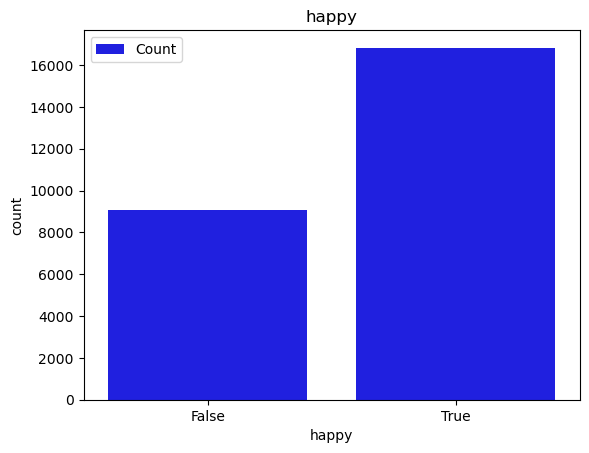

In [105]:
count_plot('happy', df2)

In [106]:
split_and_run()

,Model,Score,Accuracy
1,Support Vector Machines,65.91,65.91
5,Random Forest,63.33,63.33
0,Logistic Regression,62.90,62.90
3,KNN,61.35,61.35
8,Stochastic Gradient Decent,57.53,57.53
2,Linear SVC,55.84,55.84
4,Decision Tree,53.58,53.58
7,Perceptron,51.02,51.02
6,Naive Bayes,42.71,42.71


In [108]:
split_and_run(random_state=50)

,Model,Score,Accuracy
1,Support Vector Machines,65.91,65.91
5,Random Forest,63.72,63.72
0,Logistic Regression,62.90,62.90
3,KNN,61.35,61.35
2,Linear SVC,55.97,55.97
8,Stochastic Gradient Decent,55.17,55.17
4,Decision Tree,54.45,54.45
7,Perceptron,51.02,51.02
6,Naive Bayes,42.71,42.71


# Conclusion

We changed the weight of important features. We changed the feature of predictions. <b>The accuracy</b> of the classifiers <b>did not imporve!</b>

# Yu Zhou - Hyper parameters tuning

How to reduce the losses?

We would want Recall to be maximized, greater the Recall score higher are the chances of minimizing False Negatives.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model. The model_performance_classification_statsmodels function will be used to check the model performance of models. The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [247]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report)
# Function to print the classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['1.0', '2.0','3.0','4.0','5.0'], yticklabels = ['1.0', '2.0','3.0','4.0','5.0'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

**Hyperparameters** are the parameters that govern the entire training process. Their values are set before the learning process begins. They have a significant effect on the model’s performance. The process of finding optimal hyperparameters for a model is known as **hyperparameter tuning**. Choosing optimal hyperparameters can lead to improvements in the overall model’s performance and can help in reducing both overfitting and underfitting.

#### **Types of Hyperparameter Tuning**
Some models consist of a huge number of hyperparameters, and finding the optimal set of hyperparameters can be a very time-consuming process. To make the process efficient, the most commonly used methods are,

*   Grid Search 
*   Random Search

#### **Grid Search**

Grid search is a technique used to find the optimal set of hyperparameters for a model from the provided search space.

Let’s understand how grid search works, with an example


![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/gridsearch.png)



- Let the grey box above be set of all possible hyperparameters
- Let these black circles indicate the search space
- Grid search will iterate over all black circles in a sequence
- And finally gives the best set of hyperparameters based on the best score obtained


Grid Seach doesn’t work well on large search spaces. It will find the best set of hyperparameters but at a high cost. Grid search is best used when we have small search space. We can use a grid search to get the best possible results when we don’t have any time constraints, but when we have time constraints, it’s better to go with the random search.

#### **Random Search**

Random Search is another technique to find the best set of hyperparameters which takes lesser time than grid search

Random search is very similar to grid search, the difference is that in the random search,

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/randomsearch.png)

Here we will define the number of iterations to search. Not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. Also, the set of hyperparameters is not searched sequentially. So out of the entire search space of hyperparameters, only a certain number of sets of hyperparameters will be checked randomly.

Random SearchWorks well on large search spaces and gives better results than grid search but it doesn’t guarantee to find the best set of hyperparameters.

### **Decesion Tree Model** Tuning

In [222]:
# restore df1, df2 without the like and dislike columns
df1 = df[feature_columns]
df2 = df[['Overall_rating']]
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2, random_state=0)

### Building Decision Tree Model

In [223]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state = 8)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

              precision    recall  f1-score   support

         1.0       0.70      0.82      0.76      1997
         2.0       0.64      0.58      0.61      1458
         3.0       0.69      0.65      0.67      3768
         4.0       0.70      0.74      0.72      6731
         5.0       0.81      0.77      0.79      6762

    accuracy                           0.73     20716
   macro avg       0.71      0.71      0.71     20716
weighted avg       0.73      0.73      0.73     20716



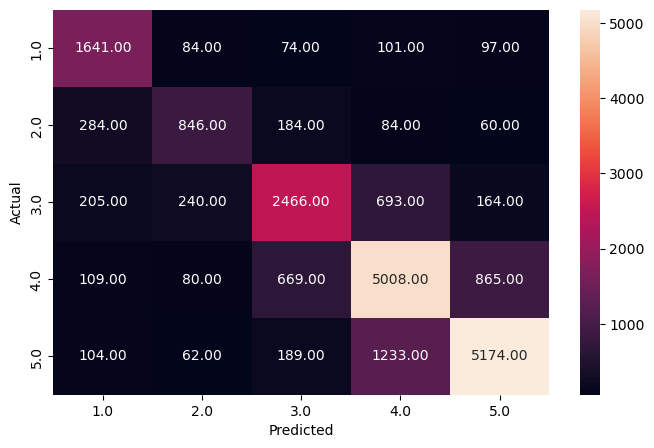

In [224]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train, y_pred_train1)

**Reading confusion matrix (clockwise)**:

- True Positive: Predicting the lead will not convert the booking and the lead does not convert. 
- False Positive: Predicting the lead will not convert and the lead is converted. 
- True Negative: Predicting the lead will convert to a paid customer and the lead does convert. 
- False Negative: Predicting the lead will convert to a paid customer but the lead does not converted.

              precision    recall  f1-score   support

         1.0       0.59      0.62      0.61       531
         2.0       0.32      0.29      0.31       373
         3.0       0.47      0.47      0.47       936
         4.0       0.60      0.63      0.61      1732
         5.0       0.74      0.71      0.72      1607

    accuracy                           0.60      5179
   macro avg       0.54      0.54      0.54      5179
weighted avg       0.60      0.60      0.60      5179



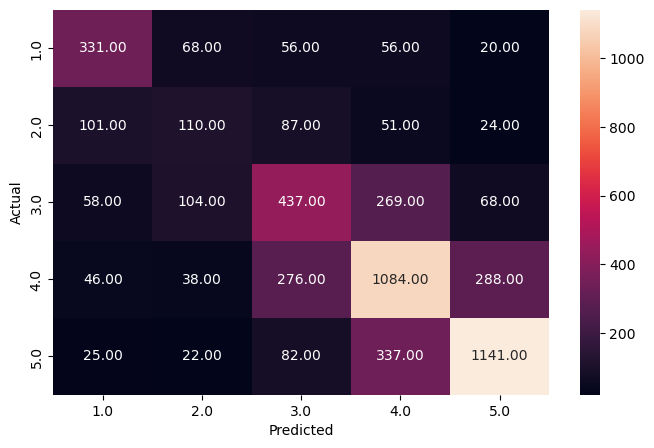

In [225]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test1)

The decision tree model is overfitting the training data as expected and is not able to generalize well on the test set.
Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth to reduce overfitting of the model. We can tune some other hyperparameters as well.

#### Do we need to prune the tree?

Pre pruning is nothing but stoping the growth of decision tree on an early stage. For that we can limit the growth of trees by setting constrains. We can limit parameters like max_depth , min_samples etc.

An effective way to do is that we can grid search those parameters and choose the optimum values that gives better performace on test data.

As of now we will control these parameters

- max_depth: maximum depth of decision tree 
- min_sample_split: The minimum number of samples required to split an internal node 
- min_samples_leaf: The minimum number of samples required to be at a leaf node.

#### Decision Tree - Hyperparameter Tuning

In [226]:
y_train.head()

,Overall_rating
24661,5.0
1607,1.0
22627,4.0
15039,3.0
17422,4.0


In [227]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

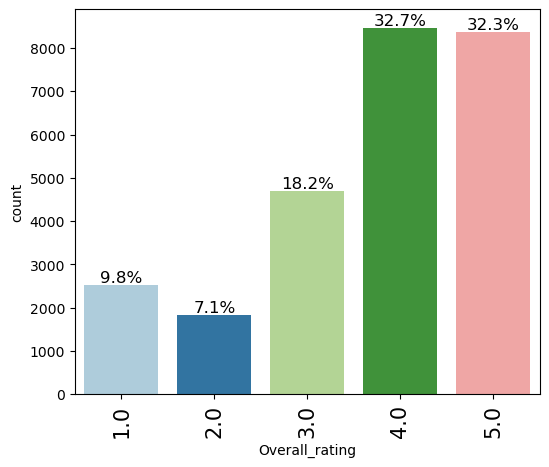

In [228]:
labeled_barplot(df, "Overall_rating", perc=True)

We will use the class_weight hyperparameter with the value equal to {1.0: 0.2, 2.0: 0.3,3.0:0.15, 4.0:0.17,5.0:0.18} which is approximately the opposite of the imbalance in the original data.

In [229]:
# To tune different models
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {1.0: 0.2, 2.0: 0.3,3.0:0.15, 4.0:0.17,5.0:0.18})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1, average='weighted')

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={1.0: 0.2, 2.0: 0.3, 3.0: 0.15, 4.0: 0.17,
                                     5.0: 0.18},
                       max_depth=8, min_samples_leaf=10, random_state=7)

              precision    recall  f1-score   support

         1.0       0.69      0.66      0.68      1997
         2.0       0.41      0.46      0.43      1458
         3.0       0.56      0.43      0.49      3768
         4.0       0.61      0.75      0.67      6731
         5.0       0.79      0.71      0.75      6762

    accuracy                           0.65     20716
   macro avg       0.61      0.60      0.60     20716
weighted avg       0.65      0.65      0.65     20716



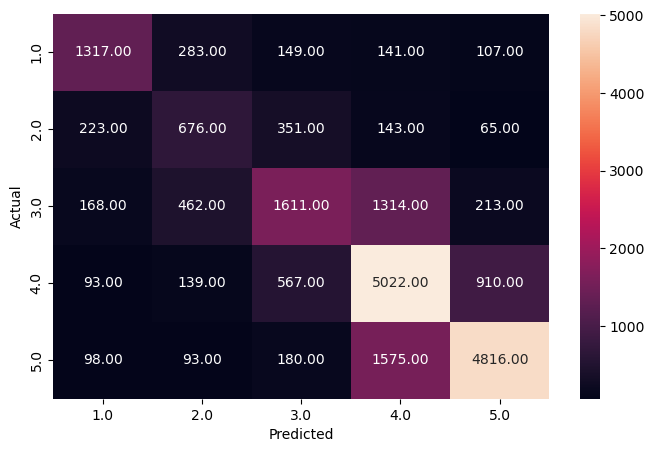

In [230]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

         1.0       0.67      0.59      0.63       531
         2.0       0.35      0.39      0.37       373
         3.0       0.51      0.38      0.44       936
         4.0       0.60      0.73      0.65      1732
         5.0       0.77      0.70      0.73      1607

    accuracy                           0.62      5179
   macro avg       0.58      0.56      0.56      5179
weighted avg       0.62      0.62      0.62      5179



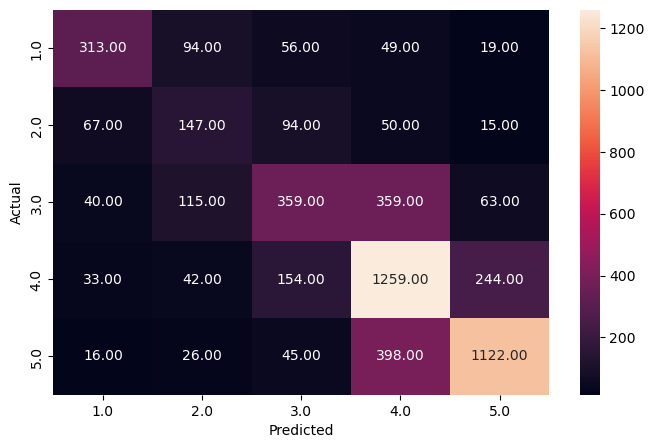

In [231]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

The recall and precision are higher to 64%.
The overfitting has been reduced. The model is performing more generalized on both training and testing data.

####  Visualizing the Decision Tree

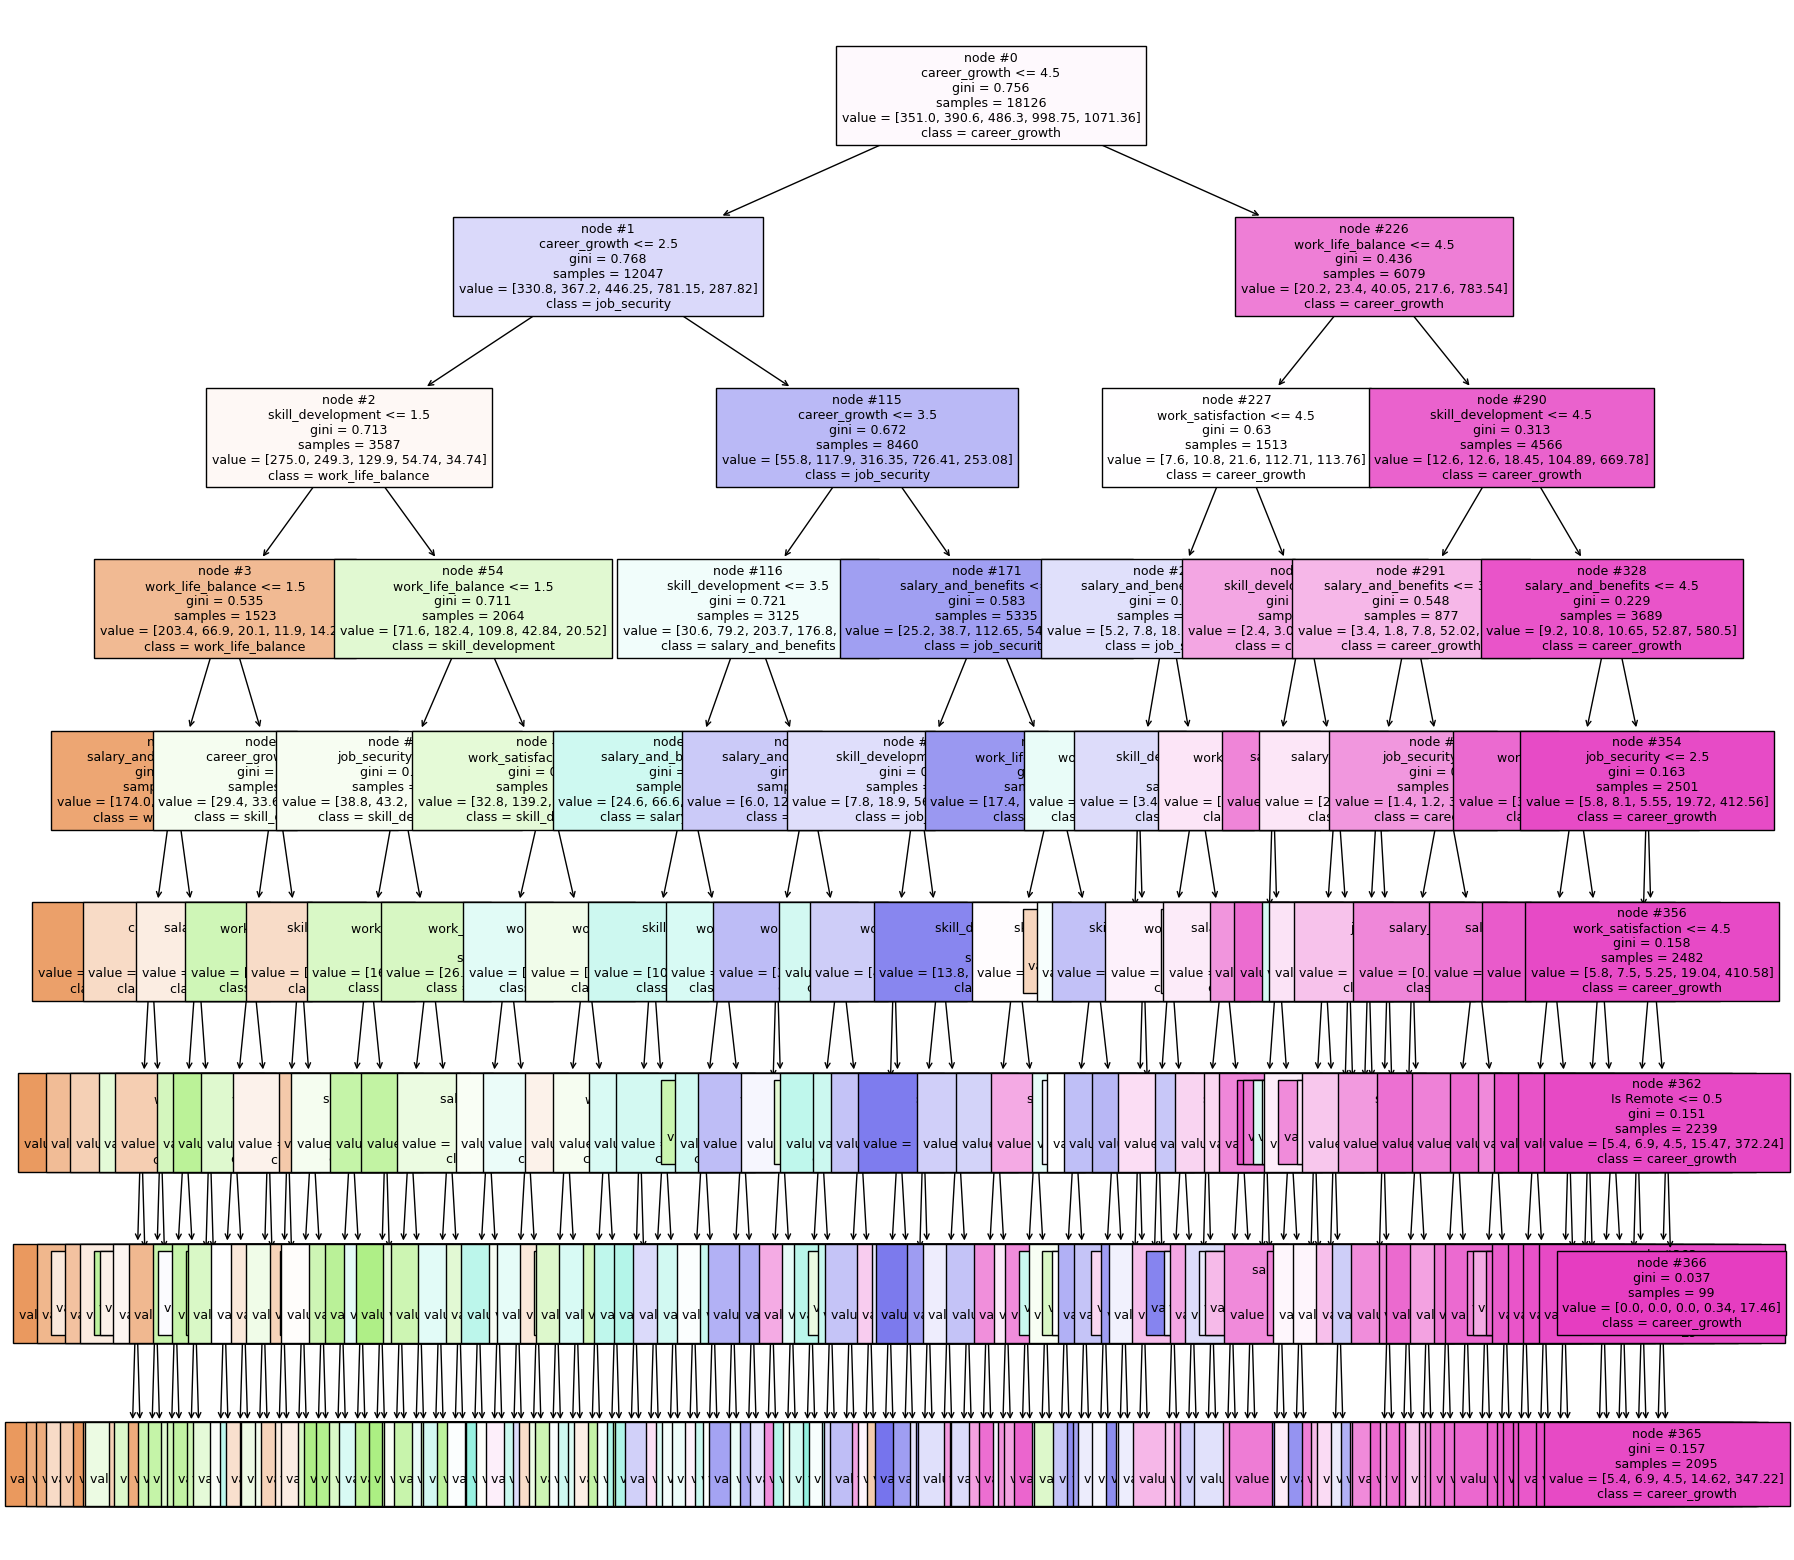

In [203]:
from sklearn import tree

features = list(df1.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = features)

plt.show()

#### Let's look at the feature importance of the tuned decision tree model

In [204]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                          Imp
career_growth        0.620986
skill_development    0.138949
work_life_balance    0.126446
salary_and_benefits  0.063828
work_satisfaction    0.027860
job_security         0.021794
Is Remote            0.000136


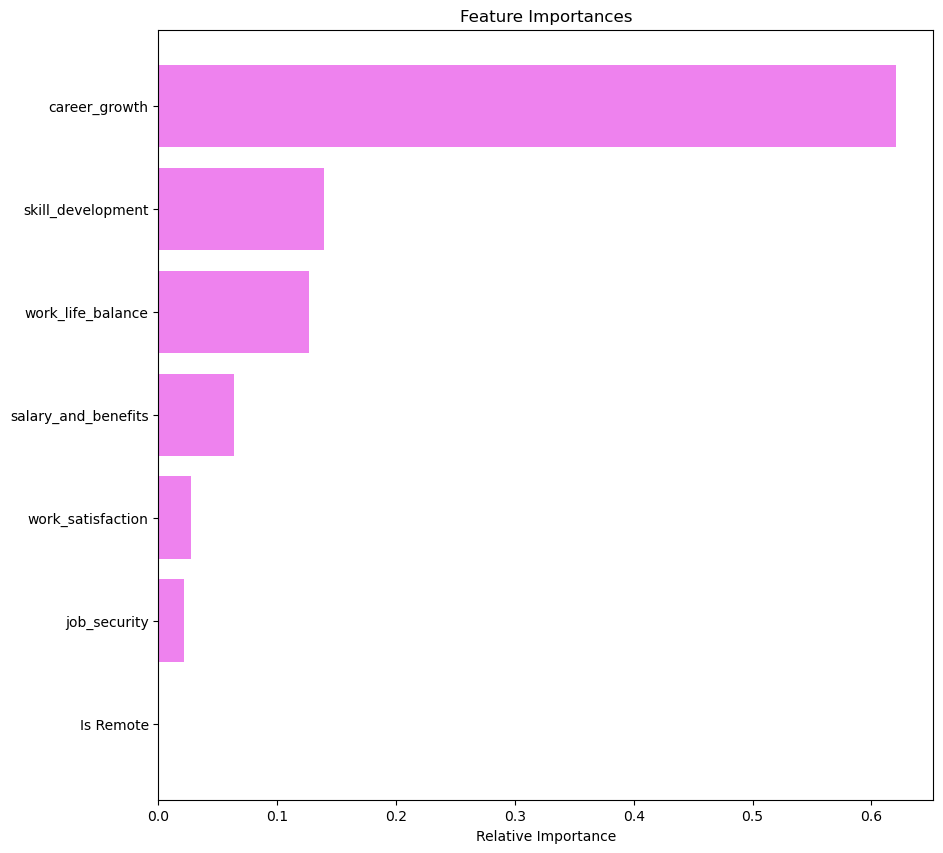

In [205]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

The "career_growth" and "work_life_balance" are the most important features. The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not.

### **Random Forest model** Tuning

####  Building a Random Forest model

In [232]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "entropy")
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

         1.0       0.73      0.77      0.75      1997
         2.0       0.66      0.54      0.60      1458
         3.0       0.69      0.64      0.67      3768
         4.0       0.70      0.75      0.72      6731
         5.0       0.80      0.79      0.79      6762

    accuracy                           0.73     20716
   macro avg       0.72      0.70      0.71     20716
weighted avg       0.73      0.73      0.73     20716



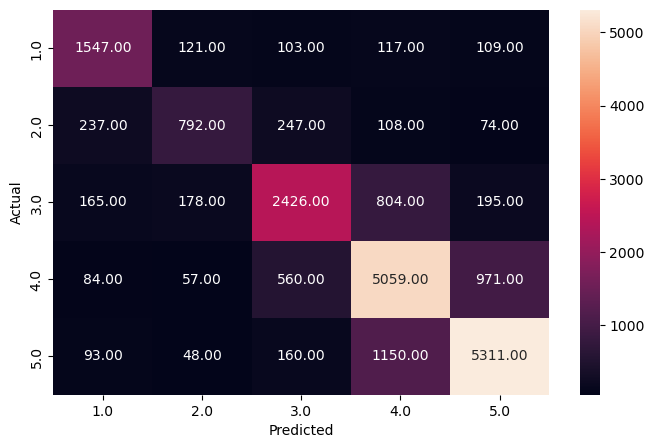

In [233]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

         1.0       0.63      0.61      0.62       531
         2.0       0.35      0.26      0.30       373
         3.0       0.47      0.48      0.48       936
         4.0       0.60      0.63      0.62      1732
         5.0       0.73      0.73      0.73      1607

    accuracy                           0.61      5179
   macro avg       0.56      0.54      0.55      5179
weighted avg       0.60      0.61      0.60      5179



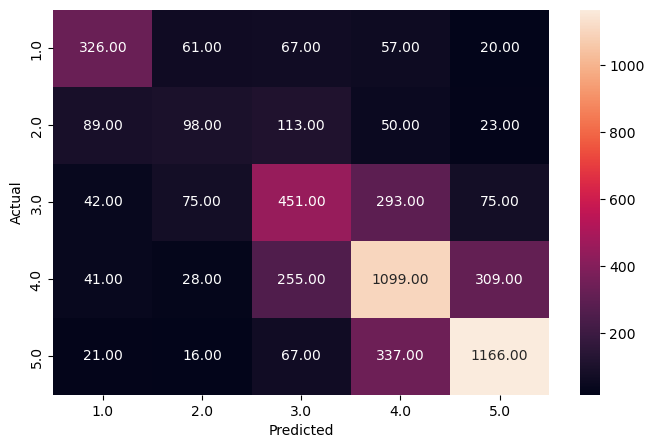

In [234]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

### **Do we need to prune the tree?**

Pre pruning is nothing but stoping the growth of decision tree on an early stage. For that we can limit the growth of trees by setting constrains. We can limit parameters like max_depth , min_samples etc.

An effective way to do is that we can grid search those parameters and choose the optimum values that gives better performace on test data.

As of now we will control these parameters

- max_depth: maximum depth of decision tree 
- min_sample_split: The minimum number of samples required to split an internal node
- min_samples_leaf: The minimum number of samples required to be at a leaf node.

### Random Forest Classifier - Hyperparameter Tuning

Comparatively, the results from random forest classifier were decent on both training and testing data. It has higher F1_Score and the precision on the testing data. The recall is lower.

In [209]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1, average='weighted')

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [210]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.8,
                       n_estimators=120, random_state=7)

              precision    recall  f1-score   support

         1.0       0.72      0.62      0.67      1997
         2.0       0.37      0.52      0.43      1458
         3.0       0.57      0.42      0.48      3768
         4.0       0.62      0.71      0.66      6731
         5.0       0.77      0.73      0.75      6762

    accuracy                           0.64     20716
   macro avg       0.61      0.60      0.60     20716
weighted avg       0.65      0.64      0.64     20716



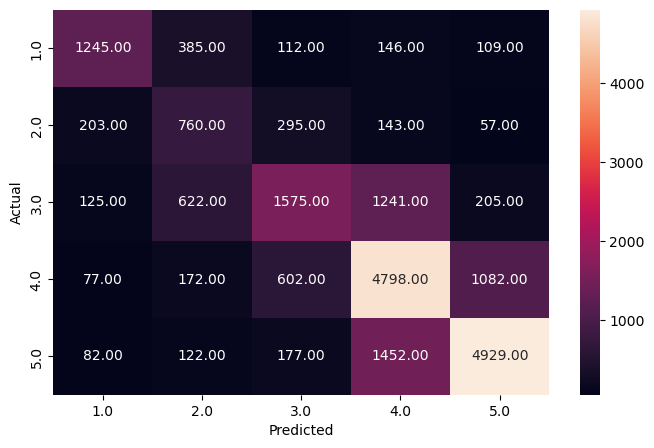

In [235]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

We can see that after hyperparameter tuning, the model is performing poorly on the train data as well. We can try adding some other hyperparameters and/or changing values of some hyperparameters to tune the model and see if we can get better performance.

In [212]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{1.0: 0.2, 2.0: 0.3,3.0:0.15, 4.0:0.17,5.0:0.18}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1, average='weighted')

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={1.0: 0.2, 2.0: 0.3, 3.0: 0.15, 4.0: 0.17,
                                     5.0: 0.18},
                       criterion='entropy', max_depth=7, max_features=0.8,
                       max_samples=0.9, min_samples_leaf=25, n_estimators=110,
                       random_state=7)

              precision    recall  f1-score   support

         1.0       0.72      0.62      0.67      1997
         2.0       0.37      0.52      0.43      1458
         3.0       0.57      0.42      0.48      3768
         4.0       0.62      0.71      0.66      6731
         5.0       0.77      0.73      0.75      6762

    accuracy                           0.64     20716
   macro avg       0.61      0.60      0.60     20716
weighted avg       0.65      0.64      0.64     20716



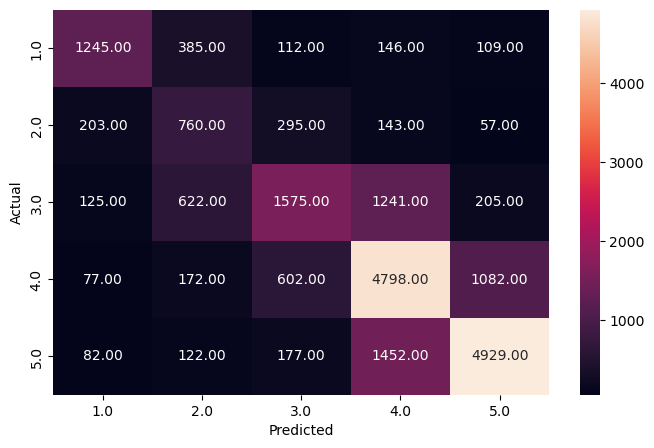

In [236]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

              precision    recall  f1-score   support

         1.0       0.70      0.57      0.63       531
         2.0       0.35      0.49      0.41       373
         3.0       0.52      0.38      0.44       936
         4.0       0.61      0.70      0.65      1732
         5.0       0.76      0.73      0.74      1607

    accuracy                           0.62      5179
   macro avg       0.59      0.57      0.58      5179
weighted avg       0.63      0.62      0.62      5179



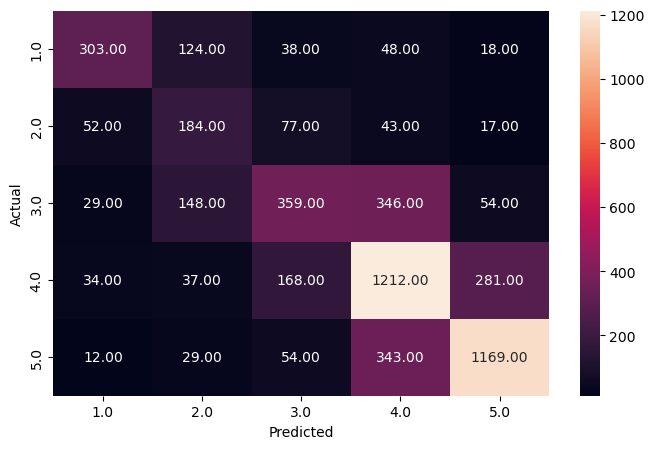

In [237]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.

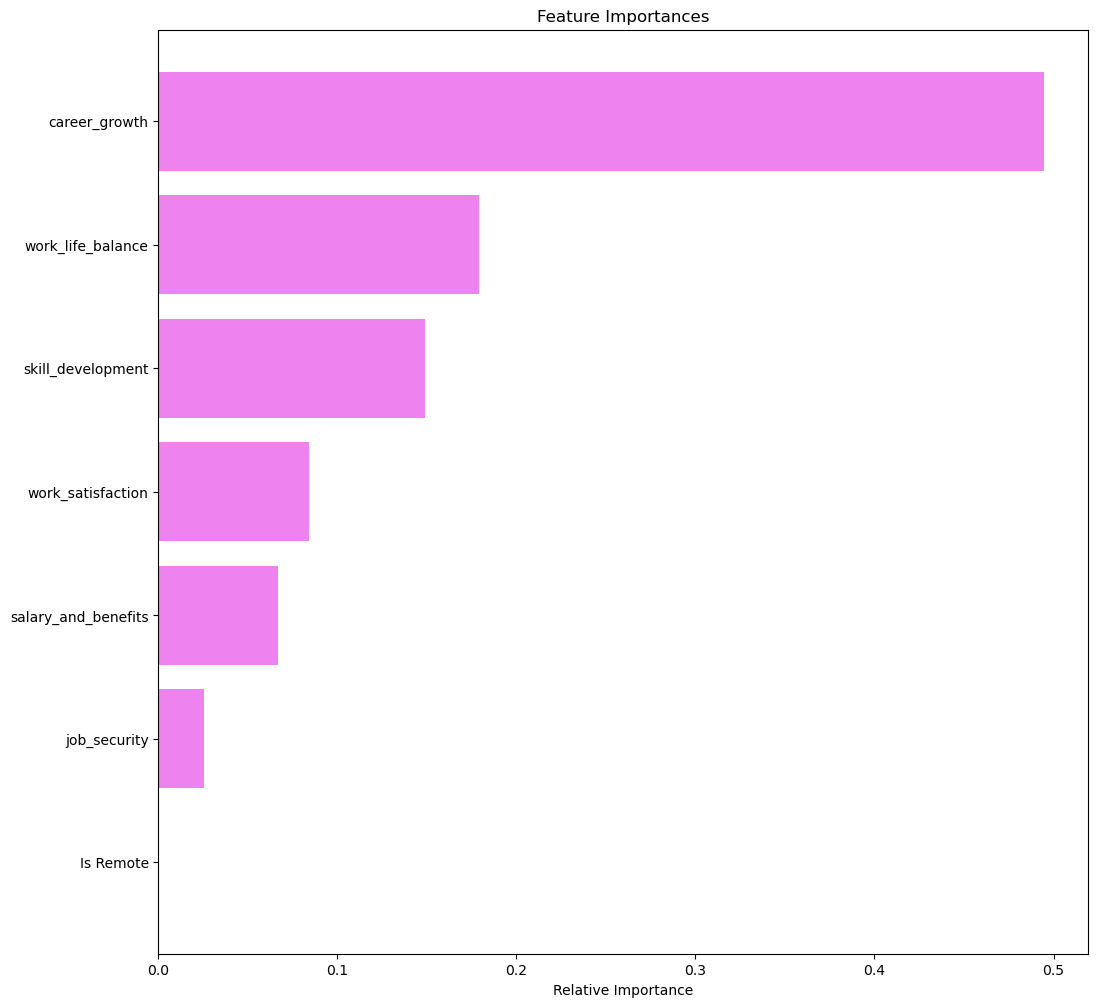

In [215]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(df1.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Support Vector Machines** Tuning

In [240]:
df1 = df[feature_columns]
df2 = df[['Overall_rating']]
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.3, random_state=0)

In [242]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn.model_selection import GridSearchCV

# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=df1.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=df1.columns)

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**

#### **Linear Kernel**

In [243]:
# Fitting SVM
svm = SVC(kernel='linear') # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

              precision    recall  f1-score   support

         1.0       0.60      0.70      0.65      1755
         2.0       0.00      0.00      0.00      1302
         3.0       0.47      0.47      0.47      3242
         4.0       0.59      0.72      0.65      5875
         5.0       0.76      0.72      0.74      5952

    accuracy                           0.62     18126
   macro avg       0.48      0.52      0.50     18126
weighted avg       0.58      0.62      0.60     18126



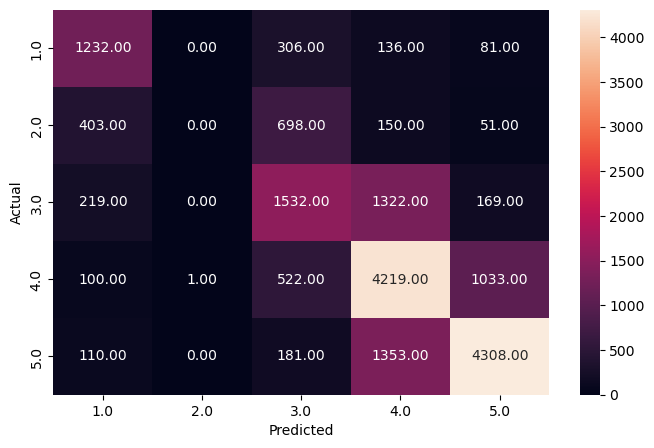

In [250]:
y_pred_train_svm = model.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

         1.0       0.59      0.66      0.63       773
         2.0       0.00      0.00      0.00       529
         3.0       0.46      0.44      0.45      1462
         4.0       0.58      0.71      0.64      2588
         5.0       0.75      0.72      0.73      2417

    accuracy                           0.61      7769
   macro avg       0.48      0.51      0.49      7769
weighted avg       0.57      0.61      0.59      7769



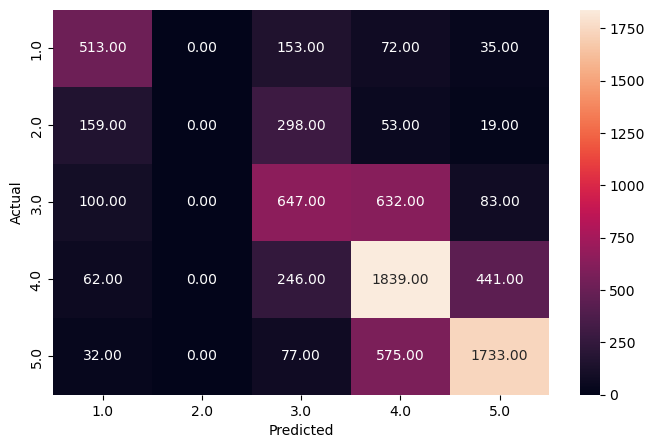

In [249]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_svm)

* SVM model with **linear kernel** is not overfitting as the accuracy is around 62%~63% for both train and test dataset
* The **Recall** for the model is around 50% to 70%(%0 for 2.0) implying that our model will not correctly predict the employees's overall rating

#### **RBF Kernel**

In [116]:
svm_rbf=SVC(kernel='rbf',probability=True)
# Fit the model
svm_rbf.fit(X_train_scaled,y_train)
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)
print(y_scores_svm)

[[0.02515563 0.03672018 0.42874558 0.42615967 0.08321894]
 [0.60624867 0.19587931 0.13833676 0.02744456 0.0320907 ]
 [0.01997396 0.01663463 0.04587744 0.4698531  0.44766087]
 ...
 [0.01864109 0.01426997 0.04928792 0.1269692  0.79083181]
 [0.01831708 0.02158945 0.17302265 0.68187574 0.10519508]
 [0.37554739 0.32128776 0.23111763 0.04708197 0.02496525]]


In [ ]:
y_pred_train = svm_rbf.predict(X_test_scaled) 
metrics_score(y_test, y_pred_train)

In [119]:
from sklearn.model_selection import GridSearchCV

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf']}  
  
svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
svc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=  36.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=  42.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=  40.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.634 total time=  40.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.629 total time=  37.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.635 total time=  31.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.640 total time=  28.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.630 total time=  28.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.639 total time=  32.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.635 total time=  30.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.622 total time=  39.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

              precision    recall  f1-score   support

         1.0       0.66      0.65      0.65       773
         2.0       0.44      0.26      0.33       529
         3.0       0.51      0.53      0.52      1462
         4.0       0.62      0.70      0.66      2588
         5.0       0.78      0.71      0.74      2417

    accuracy                           0.64      7769
   macro avg       0.60      0.57      0.58      7769
weighted avg       0.64      0.64      0.64      7769



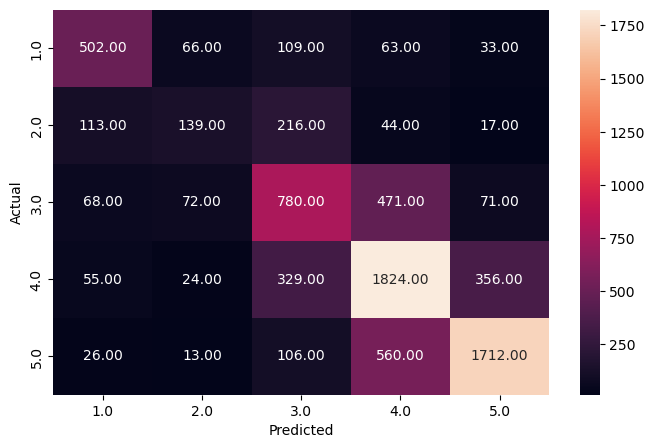

In [248]:
y_pred_train = svc.predict(X_test_scaled) 
metrics_score(y_test, y_pred_train)

**Conclusion**: We aim to hyperparameter tuning with three models: Decision tree, Random Forist and Support Vector machine.
We see that Decision tree and Random Forist models prediction accuracy improved but not with Support Vector machine.
And in general, can't get the better result than 65% accuracy.
This mihgt is caused the labled column "Overall_rating" have 5 possible values which is multiple target values instead binary calssifier.